In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing

In [4]:
feature=pd.read_csv('confounder_data.csv')

In [5]:
run_order=pd.read_csv("Injection Order for biological samples.csv",index_col=0)

In [6]:
run_order['CLIENT_SAMPLE_ID']=run_order['CLIENT_SAMPLE_ID'].apply(lambda x: '_'.join(x.split()))

In [7]:
feature = feature.merge(run_order[['CLIENT_SAMPLE_ID', 'RUN_ORDER']], on='CLIENT_SAMPLE_ID', how='left')

In [8]:
feature['Susceptibility (Broad)'].unique()

array(['extremely_high_susceptibility', 'very_high_susceptibility',
       'very_low_susceptibility', 'low_susceptibility',
       'high_susceptibility', 'extremely_resistant', nan,
       'intermediate_susceptibility', 'resistant'], dtype=object)

In [9]:
resistant_map={'extremely_high_susceptibility':1, 'very_high_susceptibility':2,
       'very_low_susceptibility':6, 'low_susceptibility':5,
       'high_susceptibility':3, 'extremely_resistant':8, 
       'intermediate_susceptibility':4, 'resistant':7}

In [10]:
feature['Susceptibility (Broad)']=feature['Susceptibility (Broad)'].replace(resistant_map)

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3218754269.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feature['Susceptibility (Broad)']=feature['Susceptibility (Broad)'].replace(resistant_map)


In [11]:
feature=feature[feature['Susceptibility (Broad)'].notnull()]

In [12]:
feature['Animal Species'].unique()

array(['Bat-Eared Fox', 'Black Howler Monkey', 'Reticulated Giraffe',
       'Cheetah', 'CA Sea Lion', 'African Elephant', 'Dama Gazelle',
       'African Lion', 'Tenrec', 'Rodrigues fruit bats', 'Red river hog',
       'Jaguar', 'Amur tiger', 'Maned wolf', 'Ruffed lemur',
       'Golden Lion tamarin', "Geoffrey's marmoset", 'white faced Saki',
       'Palawan binturong', 'American Alligator', 'NMR Colony VG 2-7',
       'DMR Colony', 'NMR Colony 7-5', 'American Bison', 'Raccoon',
       'Hippo', 'Giraffe', 'Zebra', 'Amur leopard', 'Snow leopard',
       'Golden lion tamarin', 'Meerkat', 'Common warthog',
       'African Serval', 'NMR Colony 7-1', 'NMR Colony 7-6',
       'Amur Leopard', 'Kangaroo', 'Vampire bats', 'Naked Mole Rats',
       'Sugar glider', 'Bat eared fox', 'NMR Colony VG 2-3',
       'NMR Colony 7-2', 'Holstein Cow', 'Snow Leopard', 'Fennec Fox',
       'Common Warthog', 'Lesser Kudu', 'Ring tailed lemur',
       'Pygmy loris', 'African lion', 'Pied Tamarin', 'African 

In [13]:
feature.isnull().sum()

CLIENT_SAMPLE_ID                  0
Zoo/Lab                           0
Animal Species                    0
Susceptibility (Conservative)    49
Susceptibility (Broad)            0
Animal class/order                0
Sex                               2
Batch                             0
Susceptibility (binary)           0
RUN_ORDER                         0
dtype: int64

In [14]:
feature['Sex'].value_counts()

Sex
M      56
F      52
M&F     3
UNK     2
SF      1
Name: count, dtype: int64

In [15]:
feature['Sex']=feature['Sex'].replace({"M":0,'F':1,'SF':1,'M&F':0.5,'UNK':0.5})

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\2099613641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feature['Sex']=feature['Sex'].replace({"M":0,'F':1,'SF':1,'M&F':0.5,'UNK':0.5})


In [16]:
feature['Sex']=feature['Sex'].fillna(0.5)

In [17]:
feature= pd.get_dummies(feature, columns=['Zoo/Lab'], prefix='ZooLab')

In [18]:
feature['ZooLab_Bronx Zoo [General]'].value_counts()

ZooLab_Bronx Zoo [General]
False    101
True      15
Name: count, dtype: int64

In [19]:
#Phylogenetic Distance
feature['Animal class/order'].unique()

array(['Carnivora', 'Primates', 'Artiodactyla', 'Proboscidea',
       'Afrosoricida', 'Chiroptera', 'Reptilia', 'Rodentia',
       'Perissodactyla', 'Diprotodontia', 'Pilosa'], dtype=object)

In [20]:
# from ete3 import Tree
# with open ('kbpBHl1lfajMH2avxEXf1A_newick.txt','r') as file:
#     newick_string = file.read().strip()
# tree = Tree(newick_string,quoted_node_names=True)

In [21]:
#Archosauria (which includes crocodiles and birds)
#Lepidosauria (which includes lizards and snakes)
#Testudines (which includes turtles)
class_map={'Carnivora':51.4, 'Primates':65, 'Artiodactyla':54.6, 'Proboscidea':6.9,
       'Afrosoricida':61.3, 'Chiroptera':59.1, 'Reptilia':209.2, 'Rodentia':67.4,
       'Perissodactyla':48, 'Diprotodontia':55.1, 'Pilosa':31}

In [22]:
# MA speices map
# pd.DataFrame(feature['Animal Species'].unique()).to_csv('Animal_species.csv')
# species_MA_map={'Bat-Eared Fox':5.54, 'Black Howler Monkey':3.04, 'Reticulated Giraffe':6.48,
#        'Cheetah', 'CA Sea Lion', 'African Elephant', 'Dama Gazelle',
#        'African Lion', 'Tenrec', 'Rodrigues fruit bats', 'Red river hog',
#        'Jaguar', 'Amur tiger', 'Maned wolf', 'Ruffed lemur',
#        'Golden Lion tamarin', "Geoffrey's marmoset", 'white faced Saki',
#        'Palawan binturong', 'American Alligator', 'NMR Colony VG 2-7',
#        'DMR Colony', 'NMR Colony 7-5', 'American Bison', 'Raccoon',
#        'Hippo', 'Giraffe', 'Zebra', 'Amur leopard', 'Snow leopard',
#        'Golden lion tamarin', 'Meerkat', 'Common warthog',
#        'African Serval', 'NMR Colony 7-1', 'NMR Colony 7-6',
#        'Amur Leopard', 'Kangaroo', 'Vampire bats', 'Naked Mole Rats',
#        'Sugar glider', 'Bat eared fox', 'NMR Colony VG 2-3',
#        'NMR Colony 7-2', 'Holstein Cow', 'Snow Leopard', 'Fennec Fox',
#        'Common Warthog', 'Lesser Kudu', 'Ring tailed lemur',
#        'Pygmy loris', 'African lion', 'Pied Tamarin', 'African cheetah',
#        "Linnaeus' two toed sloth", 'Sand cat', 'Clouded leopard',
#        'Fennec fox', 'NMR Colony VG 2-4', 'NMR Colony 7-3',
#        'Patagonian Mara', 'Random sloth', 'Red kangaroo',
#        'NMR Colony VG 2-5', 'NMR Colony 7-4'}

In [23]:
feature['Animal class/order']=feature['Animal class/order'].replace(class_map)

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1279661048.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feature['Animal class/order']=feature['Animal class/order'].replace(class_map)


# concat feature and data

In [24]:
data=pd.read_csv('std_transformed_data.csv',index_col=0)

In [25]:
# data= data.fillna(data.min())

In [26]:
# data=data[20:]

In [27]:
metadata=pd.read_excel('UNPA-02-24ML+ MIXED FECES DATA TABLES_animals.XLSX', sheet_name='Sample Meta Data')

In [28]:
metadata=metadata[20:]

In [29]:
sample_index=metadata['CLIENT_SAMPLE_ID']

In [30]:
sample_index = sample_index.str.replace(' ', '_')

In [31]:
sample_index=sample_index[sample_index.isin(feature['CLIENT_SAMPLE_ID'])]

In [32]:
feature = feature.set_index('CLIENT_SAMPLE_ID').loc[sample_index].reset_index()

In [33]:
data_hasLabel=data.loc[sample_index.index]

In [34]:
data_hasLabel = data_hasLabel.loc[:, data_hasLabel.notnull().sum() >= 15]

In [35]:
data_hasLabel.shape

(116, 1776)

In [36]:
allData=pd.concat([feature.reset_index(drop=True),data_hasLabel.reset_index(drop=True)],axis=1)

# Phylogenetic Distance

In [37]:
MA_map=pd.read_csv('Animal_species.csv',index_col=0,encoding='windows-1252')

In [38]:
MA_ancestor_map = MA_map.set_index('Animal species')['MA_distance_ancestor'].to_dict()

In [39]:
allData['MA_ancestor']=allData['Animal Species'].replace(MA_ancestor_map)

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3247375110.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  allData['MA_ancestor']=allData['Animal Species'].replace(MA_ancestor_map)


# Linear mixture model

In [40]:
from sklearn.model_selection import train_test_split
y1=allData['Susceptibility (Broad)']
y2=allData['Susceptibility (binary)']
X=allData.drop(['Susceptibility (Broad)','Susceptibility (binary)'], axis=1) 

In [41]:
X['Batch'] = X['Batch'].replace({0: 1, 1: 0})

In [42]:
y_all=pd.concat([y1,y2],axis=1)

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_all, test_size=0.2, random_state=63)

In [44]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

def simpleLinear(X_train,y_train,binary=False):
    shape=X_train.shape
    if len(shape)>1:
        if X_train[X_train.columns[0]].isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train[X_train.columns[0]].notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    else:
        if X_train.isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train.notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    
    X_train_with_intercept = sm.add_constant(X_train_new)

    ols_model = sm.OLS(y_train_new, X_train_with_intercept).fit()
    p_values = ols_model.pvalues
    r_squared = ols_model.rsquared
    params= ols_model.params

    # test set
    # if len(shape)>1:
    #     if X_test[X_test.columns[0]].isna().sum()>=len(X_test)-2:
    #         test_r_squared=np.nan
    #     else:
    #         if binary:
    #             X_test_new = X_test.fillna(X_test.min())  
    #             y_test_new=y_test
    #         else:
    #             non_nan_mask = X_test[X_test.columns[0]].notna() 
    #             X_test_new = X_test[non_nan_mask.values]
    #             y_test_new = y_test[non_nan_mask.values] 
    #         X_test_with_intercept = sm.add_constant(X_test_new,has_constant='add')
    #         missing_cols = set(ols_model.model.exog_names) - set(X_test_with_intercept.columns)
    #         for col in missing_cols:
    #             X_test_with_intercept[col] = 1.0  

    #         X_test_with_intercept = X_test_with_intercept[ols_model.model.exog_names] 
    #         y_predicted=ols_model.predict(X_test_with_intercept)
    #         test_r_squared = r2_score(y_test_new, y_predicted)
    # else:
    #     if X_test.isna().sum()>=len(X_test)-2:
    #         test_r_squared=np.nan
    #     else:
    #         if binary:
    #             X_test_new = X_test.fillna(X_test.min())  
    #             y_test_new=y_test
    #         else:
    #             non_nan_mask = X_test.notna() 
    #             X_test_new = X_test[non_nan_mask.values]
    #             y_test_new = y_test[non_nan_mask.values]                
    #         X_test_with_intercept = sm.add_constant(X_test_new)
    #         y_predicted=ols_model.predict(X_test_with_intercept)
    #         test_r_squared = r2_score(y_test_new, y_predicted)
    

    return p_values,r_squared, params
    # print("P-values:\n", p_values)
    # print("R-squared:", r_squared)
    # print(ols_model.summary())


In [45]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

def FeatureLinear(X_train,y_train,formula,binary=False):
    shape=X_train.shape
    if len(shape)>1:
        if X_train[X_train.columns[0]].isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train[X_train.columns[0]].notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    else:
        if X_train.isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train.notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    
    # X_train_with_intercept = sm.add_constant(X_train_new)
    data = pd.concat([X_train_new, y_train_new], axis=1)
    data.columns = list(X_train_new.columns) + ['y']

    ols_model = smf.ols(formula , data=data).fit()
    p_values = ols_model.pvalues
    r_squared = ols_model.rsquared
    params= ols_model.params

    # test set
    # if len(shape)>1:
    #     if X_test[X_test.columns[0]].isna().sum()>=len(X_test)-2:
    #         test_r_squared=np.nan
    #     else:
    #         if binary:
    #             X_test_new = X_test.fillna(X_test.min())  
    #             y_test_new=y_test
    #         else:
    #             non_nan_mask = X_test[X_test.columns[0]].notna() 
    #             X_test_new = X_test[non_nan_mask.values]
    #             y_test_new = y_test[non_nan_mask.values] 
    #         X_test_with_intercept = sm.add_constant(X_test_new,has_constant='add')
    #         missing_cols = set(ols_model.model.exog_names) - set(X_test_with_intercept.columns)
    #         for col in missing_cols:
    #             X_test_with_intercept[col] = 1.0  

    #         X_test_with_intercept = X_test_with_intercept[ols_model.model.exog_names] 
    #         y_predicted=ols_model.predict(X_test_with_intercept)
    #         test_r_squared = r2_score(y_test_new, y_predicted)
    # else:
    #     if X_test.isna().sum()>=len(X_test)-2:
    #         test_r_squared=np.nan
    #     else:
    #         if binary:
    #             X_test_new = X_test.fillna(X_test.min())  
    #             y_test_new=y_test
    #         else:
    #             non_nan_mask = X_test.notna() 
    #             X_test_new = X_test[non_nan_mask.values]
    #             y_test_new = y_test[non_nan_mask.values]                
    #         X_test_with_intercept = sm.add_constant(X_test_new)
    #         y_predicted=ols_model.predict(X_test_with_intercept)
    #         test_r_squared = r2_score(y_test_new, y_predicted)
    

    return p_values,r_squared, params
    # print("P-values:\n", p_values)
    # print("R-squared:", r_squared)
    # print(ols_model.summary())

In [46]:
import statsmodels.formula.api as smf
def simpleLogit(X_train,y_train,binary=True):
    shape=X_train.shape
    if len(shape)>1:
        if X_train[X_train.columns[0]].isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train[X_train.columns[0]].notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    else:
        if X_train.isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train.notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    
    X_train_with_intercept = sm.add_constant(X_train_new)

    logit_model = sm.Logit(y_train_new, X_train_with_intercept).fit()
    p_values = logit_model.pvalues
    aic = logit_model.aic
    r2_mcfadden = 1 - (logit_model.llf / logit_model.llnull)
    params= logit_model.params
    return p_values,aic,r2_mcfadden,params

In [47]:
import statsmodels.formula.api as smf
def FeatureLogit(X_train,y_train,formula,binary=True):
    shape=X_train.shape
    if len(shape)>1:
        if X_train[X_train.columns[0]].isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train[X_train.columns[0]].notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    else:
        if X_train.isna().sum()>=len(X_train)-2:
            return np.nan, np.nan
        if binary:
            X_train_new = X_train.fillna(X_train.min())  
            y_train_new=y_train
        else:
            non_nan_mask = X_train.notna() 
            X_train_new = X_train[non_nan_mask.values]
            y_train_new = y_train[non_nan_mask.values]
    
    data = pd.concat([X_train_new, y_train_new], axis=1)
    data.columns = list(X_train_new.columns) + ['y']

    logit_model = smf.logit(formula,data=data).fit()
    p_values = logit_model.pvalues
    aic = logit_model.aic
    r2_mcfadden = 1 - (logit_model.llf / logit_model.llnull)
    params= logit_model.params
    return p_values,aic,r2_mcfadden,params  

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_rsquare_distribution(r_squared_values,title):
    r_squared_values= [x for x in r_squared_values if not (isinstance(x, float) and math.isnan(x))]
    sns.histplot(r_squared_values, kde=True)
    percentile_95 = np.percentile(r_squared_values, 95)
    plt.axvline(x=percentile_95, color='red', linestyle='--', label=f'95th percentile: {percentile_95:.2f}')


    plt.text(percentile_95 + 0.01, 100, f'{percentile_95:.2f}', color='red', fontsize=12)

    plt.title(title)
    plt.xlabel('R-squared')
    plt.ylabel('Frequency')

    plt.legend()
    plt.show()


In [49]:
def plot_coef_distribution(r_squared_values,title):
    r_squared_values= [x for x in r_squared_values if not (isinstance(x, float) and math.isnan(x))]
    sns.histplot(r_squared_values, kde=True)
    percentile_95 = np.percentile(r_squared_values, 95)
    percentile_5 = np.percentile(r_squared_values, 5)
    plt.axvline(x=percentile_95, color='red', linestyle='--', label=f'95th percentile: {percentile_95:.2f}')
    plt.axvline(x=percentile_5, color='red', linestyle='--', label=f'5th percentile: {percentile_5:.2f}')


    plt.text(percentile_95 + 0.01, 100, f'{percentile_95:.2f}', color='red', fontsize=12)
    plt.text(percentile_5 + 0.01, 100, f'{percentile_5:.2f}', color='red', fontsize=12)

    plt.title(title)
    plt.xlabel('Coefficient')
    plt.ylabel('Frequency')

    plt.legend()
    plt.show()

In [50]:
def plot_pvalue_distribution(r_squared_values,title):
    r_squared_values= [-np.log10(x) for x in r_squared_values if not (isinstance(x, float) and math.isnan(x))]
    sns.histplot(r_squared_values, kde=True)
    percentile_95 = np.percentile(r_squared_values, 95)
    plt.axvline(x=percentile_95, color='red', linestyle='--', label=f'95th percentile: {percentile_95:.2f}')


    plt.text(percentile_95 + 0.01, 100, f'{percentile_95:.2f}', color='red', fontsize=12)

    plt.title(title)
    plt.xlabel('-lg(p-value)')
    plt.ylabel('Frequency')

    plt.legend()
    plt.show()

In [51]:
metabolites=X.columns[14:-1]

In [52]:
# simpleLinear(X_train['30'],y_train['Susceptibility (Broad)'])[0]['30']

In [53]:
p_values=[]
r_squares=[]
params=[]

# count=0
for metabolite in metabolites:
    p_value,r_square,param=simpleLinear(X[metabolite],y_all['Susceptibility (Broad)'])
    p_values.append(p_value)
    r_squares.append(r_square)
    params.append(param)

    # if p_value[metabolite]<0.2:
    #         count+=1

In [54]:
metabolite_SBR=pd.DataFrame({'p_value':p_values,'r_square':r_squares,'param':params},index=metabolites)

In [55]:
metabolite_SBR

,p_value,r_square,param
30,const 1.145242e-38 30 9.179178e-01 dt...,0.000103,const 4.605876 30 0.023361 dtype: flo...
35,const 9.016346e-35 35 1.949039e-02 dt...,0.057893,const 4.355115 35 -0.530073 dtype: flo...
48,const 1.062246e-08 48 7.423239e-01 dt...,0.005526,const 4.337928 48 -0.148377 dtype: flo...
49,const 2.003565e-34 49 7.596358e-02 dt...,0.033472,const 4.555908 49 -0.410631 dtype: flo...
50,const 3.790461e-41 50 1.940822e-02 dt...,0.047002,const 4.399255 50 0.470850 dtype: flo...
...,...,...,...
999926266,const 2.394050e-41 999926266 5.11870...,0.003817,const 4.501788 999926266 -0.169180 dt...
999926267,const 1.336099e-32 999926267 6.94501...,0.001802,const 4.849746 999926267 -0.092623 dt...
999926268,const 7.654501e-35 999926268 1.86433...,0.018896,const 4.393504 999926268 -0.301387 dt...
999926273,const 1.833087e-23 999926273 1.63696...,0.086748,const 4.399110 999926273 0.622999 dt...


In [56]:
metabolite_SBR.iloc[1:].values

array([[const    9.016346e-35
        35       1.949039e-02
        dtype: float64       , 0.0578930997632241, const    4.355115
                                                   35      -0.530073
                                                   dtype: float64   ],
       [const    1.062246e-08
        48       7.423239e-01
        dtype: float64       , 0.005526105531185488, const    4.337928
                                                     48      -0.148377
                                                     dtype: float64   ],
       [const    2.003565e-34
        49       7.596358e-02
        dtype: float64       , 0.033471534722626095, const    4.555908
                                                     49      -0.410631
                                                     dtype: float64   ],
       ...,
       [const        7.654501e-35
        999926268    1.864330e-01
        dtype: float64           , 0.018896143200336946,
        const        4.393504
        999926

In [57]:
metabolite_SBR['r_square'].nlargest(10)

999917349    0.465517
999924767    0.432033
100003868    0.412220
1248         0.364279
100006100    0.357876
132          0.355876
100006173    0.340009
100003495    0.328954
247          0.321680
100015988    0.306671
Name: r_square, dtype: float64

In [58]:
metabolites.to_list().index('999917349')

1457

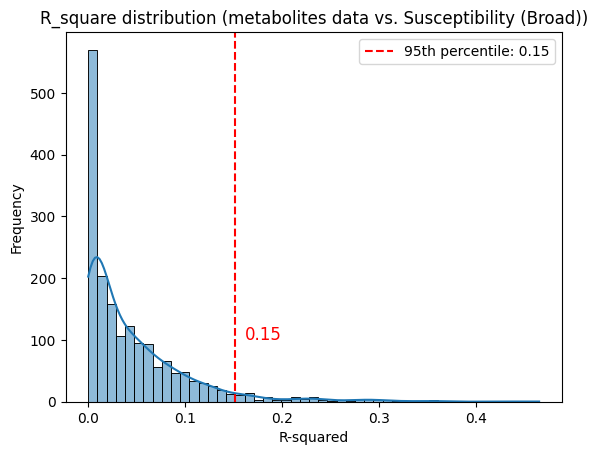

In [59]:
plot_rsquare_distribution(r_squares,'R_square distribution (metabolites data vs. Susceptibility (Broad))')

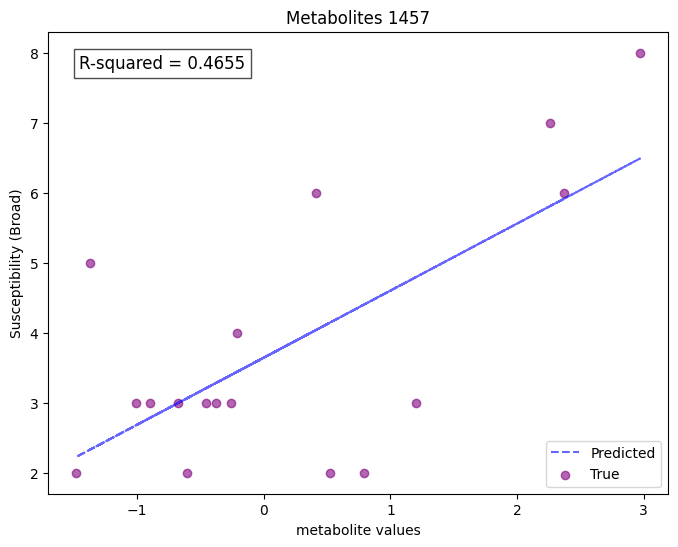

In [60]:
metabolites[1457]
# Plot actual vs predicted values
train_new=X[metabolites[1457]][X[metabolites[1457]].notna()]
X_train_with_intercept = sm.add_constant(train_new)
ols_model = sm.OLS(y_all['Susceptibility (Broad)'][X[metabolites[1457]].notna()], X_train_with_intercept).fit()
plt.figure(figsize=(8, 6))
plt.plot(train_new, ols_model.fittedvalues, color='blue', alpha=0.6,label='Predicted', linestyle='--')
plt.scatter(train_new,y_all['Susceptibility (Broad)'][X[metabolites[1457]].notna()], color='purple', alpha=0.6,label='True')
squared = ols_model.rsquared
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 1457")
plt.xlabel("metabolite values")
plt.ylabel("Susceptibility (Broad)")
plt.legend()
plt.show()


In [61]:
p_values=[]
aics=[]
r2_mcfaddens=[]
params=[]
for metabolite in metabolites:
    p_value,aic,r2_mcfadden,param=simpleLogit(X[metabolite],y_all['Susceptibility (binary)'])
    p_values.append(p_value)
    aics.append(aic)
    r2_mcfaddens.append(r2_mcfadden)
    params.append(param)
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)

Optimization terminated successfully.
         Current function value: 0.682895
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664733
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683176
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670220
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675242
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.640192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.683972
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685276
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.653603
  

In [62]:
print(r2_mcfaddens.index(max(r2_mcfaddens)))

1123


In [63]:
metabolite_SBI=pd.DataFrame({'p_value':p_values,'r2_mcfadden':r2_mcfaddens,'aic':aics,'param':params},index=metabolites)

In [64]:
metabolite_SBI

,p_value,r2_mcfadden,aic,param
30,const 0.279239 30 0.409156 dtype: flo...,0.004304,162.431541,const 0.207761 30 -0.144701 dtype: flo...
35,const 0.037641 35 0.029935 dtype: flo...,0.030785,158.217965,const 0.442303 35 0.265430 dtype: flo...
48,const 0.187437 48 0.439979 dtype: flo...,0.003894,162.496752,const 0.483053 48 0.181217 dtype: flo...
49,const 0.095632 49 0.061517 dtype: flo...,0.022784,159.491120,const 0.327538 49 0.295446 dtype: flo...
50,const 0.121652 50 0.268634 dtype: flo...,0.007820,161.871996,const 0.305161 50 -0.208345 dtype: flo...
...,...,...,...,...
999926266,const 0.166466 999926266 0.583708 dt...,0.001901,162.813927,const 0.266626 999926266 0.126151 dt...
999926267,const 0.372172 999926267 0.234731 dt...,0.008970,161.689155,const 0.174973 999926267 -0.173557 dt...
999926268,const 0.097273 999926268 0.135339 dt...,0.014563,160.799115,const 0.330869 999926268 0.268593 dt...
999926273,const 0.351670 999926273 0.732707 dt...,0.000732,162.999836,const 0.203698 999926273 -0.050812 dt...


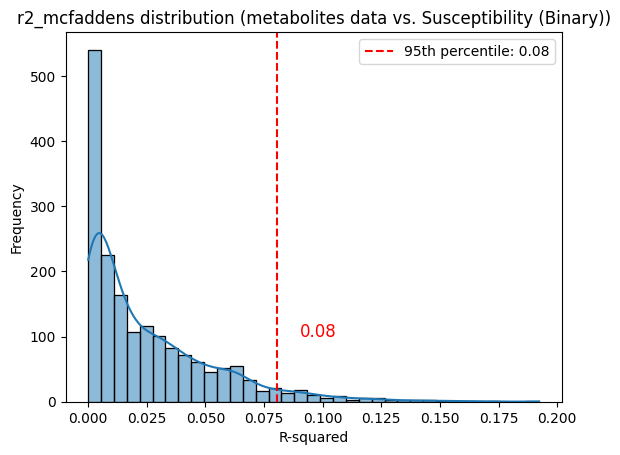

In [65]:
plot_rsquare_distribution(r2_mcfaddens,'r2_mcfaddens distribution (metabolites data vs. Susceptibility (Binary))')

In [66]:
r2_mcfaddens.index(max(r2_mcfaddens))

1123

Optimization terminated successfully.
         Current function value: 0.553970
         Iterations 6


C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1275224368.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


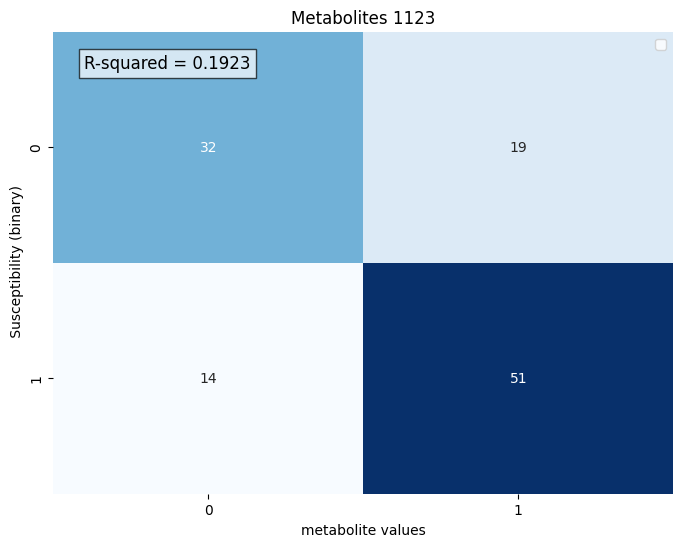

In [67]:

# Plot actual vs predicted values
train_new=X[metabolites[1123]].fillna(X[metabolites[1123]].min())
X_train_with_intercept = sm.add_constant(train_new)
ols_model = sm.Logit(y_all['Susceptibility (binary)'], X_train_with_intercept).fit()
plt.figure(figsize=(8, 6))
y_pred_prob = ols_model.predict(X_train_with_intercept)
y_pred_class = (y_pred_prob >= 0.5).astype(int)
# plt.scatter(train_new, y_pred_class, color='blue', alpha=0.6,label='Predicted')
# plt.scatter(train_new,y_all['Susceptibility (binary)'], color='purple', alpha=0.6,label='True')
contingency_table = pd.crosstab(y_all['Susceptibility (binary)'], y_pred_class)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
squared =  1 - (ols_model.llf / ols_model.llnull)
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 1123")
plt.xlabel("metabolite values")
plt.ylabel(" Susceptibility (binary)")
plt.legend()
plt.show()

In [68]:
print(max(r_squares))

0.4655174350053686


In [69]:
def convert_booleans(col):
    if col.dtype == bool:  
        return col.astype(int)
    else:
        return col 

# X_train = X_train.apply(convert_booleans)

In [70]:
# X_train.columns[3:13]

In [71]:
# X_train.columns[-1]

In [72]:
X = X.apply(convert_booleans)

In [73]:
train_new=X[[metabolites[1332]]+['Sex', 'Batch',
'RUN_ORDER','MA_ancestor']]
train_new=train_new.fillna(train_new.min())
X_train_with_intercept = sm.add_constant(train_new)
ols_model = sm.Logit(y_all['Susceptibility (binary)'], train_new).fit()

Optimization terminated successfully.
         Current function value: 0.597478
         Iterations 6


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_intercept.values, i) for i in range(X_train_with_intercept.shape[1])]


In [75]:
vif_data

,feature,VIF
0,const,14.302502
1,100021238,1.075314
2,Sex,1.076978
3,Batch,2.063674
4,RUN_ORDER,2.059580
5,MA_ancestor,1.032998


In [76]:
x=X[['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
       'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
       'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
       'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo','MA_ancestor','RUN_ORDER']].corr()

In [77]:
list(metabolites).index('100020409')

1268

In [78]:
x

,Animal class/order,Sex,Batch,ZooLab_Bronx Zoo [General],ZooLab_Cape May County,ZooLab_Gorbunova Lab- NMR/DMR,ZooLab_Lehigh Valley,ZooLab_Maryland Zoo,ZooLab_Pacific Marine Mammal Center,ZooLab_Philadelphia Zoo,MA_ancestor,RUN_ORDER
Animal class/order,1.000000,-0.020367,0.112747,0.235158,-0.029052,0.168425,-0.043800,-0.254121,-0.068122,-0.028963,0.626836,0.021916
Sex,-0.020367,1.000000,-0.074216,-0.228335,-0.118322,-0.040923,-0.051701,0.036215,0.268284,0.131173,-0.084307,-0.010769
Batch,0.112747,-0.074216,1.000000,-0.069985,0.042563,0.042563,-0.083221,0.029050,-0.040063,0.013742,-0.008935,-0.712956
ZooLab_Bronx Zoo [General],0.235158,-0.228335,-0.069985,1.000000,-0.154150,-0.154150,-0.062792,-0.159695,-0.097661,-0.290331,0.162306,0.076934
ZooLab_Cape May County,-0.029052,-0.118322,0.042563,-0.154150,1.000000,-0.160000,-0.065175,-0.165755,-0.101367,-0.301348,-0.101937,0.044697
ZooLab_Gorbunova Lab- NMR/DMR,0.168425,-0.040923,0.042563,-0.154150,-0.160000,1.000000,-0.065175,-0.165755,-0.101367,-0.301348,0.536163,-0.059443
ZooLab_Lehigh Valley,-0.043800,-0.051701,-0.083221,-0.062792,-0.065175,-0.065175,1.000000,-0.067519,-0.041291,-0.122752,-0.127981,-0.010074
ZooLab_Maryland Zoo,-0.254121,0.036215,0.029050,-0.159695,-0.165755,-0.165755,-0.067519,1.000000,-0.105013,-0.312188,-0.038158,0.019029
ZooLab_Pacific Marine Mammal Center,-0.068122,0.268284,-0.040063,-0.097661,-0.101367,-0.101367,-0.041291,-0.105013,1.000000,-0.190917,-0.109193,-0.027432
ZooLab_Philadelphia Zoo,-0.028963,0.131173,0.013742,-0.290331,-0.301348,-0.301348,-0.122752,-0.312188,-0.190917,1.000000,-0.300424,-0.040218


In [79]:
# x.to_csv('correlation.csv')

In [80]:
p_values=[]
r_squares=[]
for metabolite in metabolites:
    p_value,r_square=simpleLinear(X[[metabolite]+['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
       'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
       'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
       'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo','MA_ancestor','RUN_ORDER']],y_all['Susceptibility (binary)'],binary=True)
    p_values.append(p_value)
    r_squares.append(r_square)
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)
print(max(r_squares))
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)

ValueError: too many values to unpack (expected 2)

In [ ]:
metabolite_all_SBI=pd.DataFrame({'p_value':p_values,'r_square':r_squares},index=metabolites)

In [ ]:
print(r_squares.index(0.3902245693872226))

957


In [ ]:
metabolite_all_SBI['p_value'].values

array([const                                  0.001126
       30                                     0.316907
       Animal class/order                     0.131777
       Sex                                    0.268320
       Batch                                  0.731312
       ZooLab_Bronx Zoo [General]             0.153525
       ZooLab_Cape May County                 0.529111
       ZooLab_Gorbunova Lab- NMR/DMR          0.262477
       ZooLab_Lehigh Valley                   0.289654
       ZooLab_Maryland Zoo                    0.245680
       ZooLab_Pacific Marine Mammal Center    0.152321
       ZooLab_Philadelphia Zoo                0.103961
       MA_ancestor                            0.000227
       RUN_ORDER                              0.957239
       dtype: float64                                 ,
       const                                  0.000267
       35                                     0.065455
       Animal class/order                     0.320145
       Se

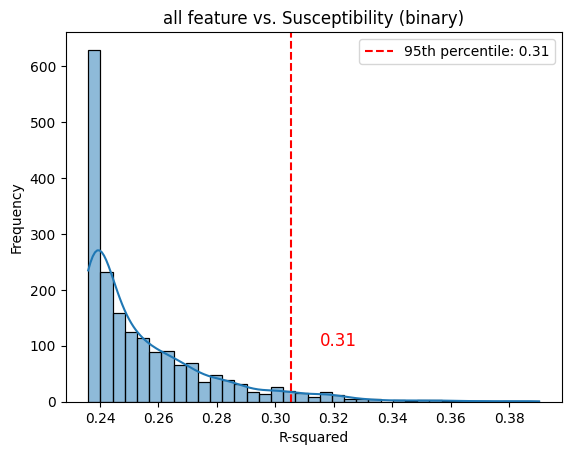

In [ ]:
plot_rsquare_distribution(r_squares,'all feature vs. Susceptibility (binary)')

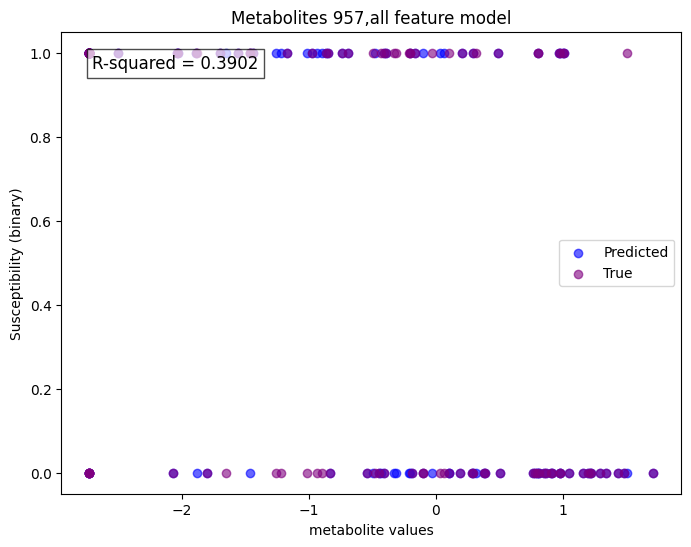

In [ ]:
train_new=X[[metabolites[957]]+['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
       'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
       'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
       'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo','MA_ancestor']]
train_new=train_new.fillna(train_new.min())
X_train_with_intercept = sm.add_constant(train_new)
ols_model = sm.OLS(y_all['Susceptibility (binary)'], X_train_with_intercept).fit()
plt.figure(figsize=(8, 6))
plt.scatter(train_new[train_new.columns[0]], (ols_model.fittedvalues >= 0.5).astype(int), color='blue', alpha=0.6,label='Predicted')
plt.scatter(train_new[train_new.columns[0]],y_all['Susceptibility (binary)'], color='purple', alpha=0.6,label='True')
squared = ols_model.rsquared
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 957,all feature model")
plt.xlabel("metabolite values")
plt.ylabel("Susceptibility (binary)")
plt.legend()
plt.show()

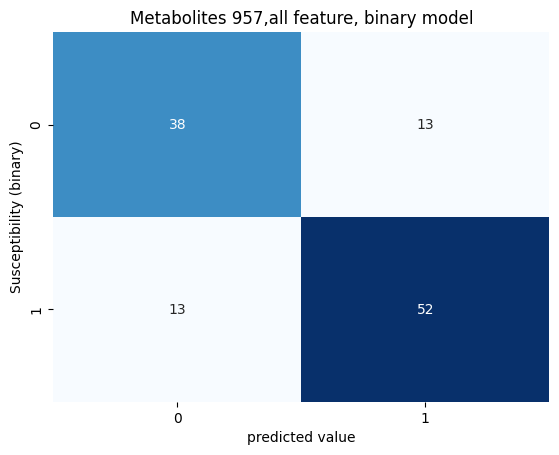

In [ ]:
plt.figure()
contingency_table = pd.crosstab(y_all['Susceptibility (binary)'], (ols_model.fittedvalues >= 0.5).astype(int))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('predicted value')
plt.title('Metabolites 957,all feature, binary model')
plt.show()

In [ ]:
p_values=[]
r_squares=[]
for metabolite in metabolites:
    p_value,r_square=simpleLinear(X[[metabolite]+['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
       'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
       'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
       'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo','MA_ancestor','RUN_ORDER']],y_all['Susceptibility (Broad)'],binary=False)
    p_values.append(p_value)
    r_squares.append(r_square)
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)
print(max(r_squares))

1.0


In [ ]:
metabolite_all_SBR=pd.DataFrame({'p_value':p_values,'r_square':r_squares},index=metabolites)

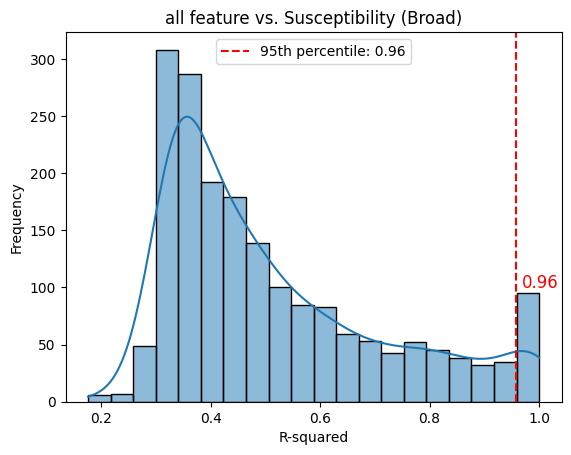

In [ ]:
plot_rsquare_distribution(r_squares,'all feature vs. Susceptibility (Broad)')

In [ ]:
print(r_squares.index(1.0))

20


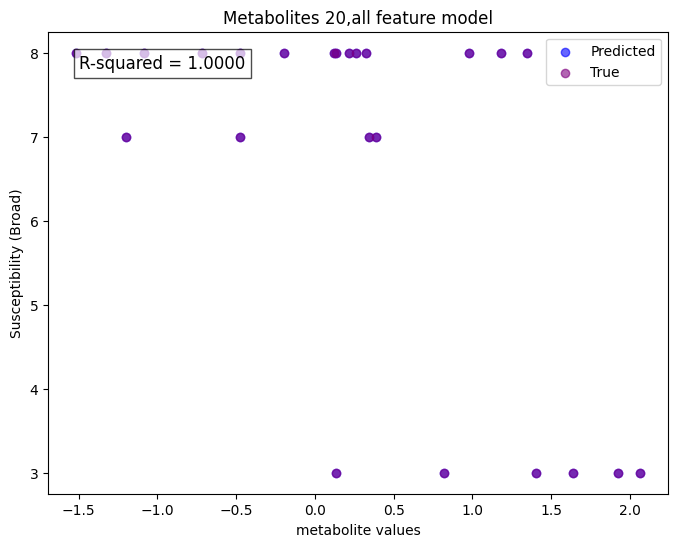

In [ ]:
non_na=X[[metabolites[20]]].notna()
X_train_with_intercept = sm.add_constant(X[[metabolites[20]]+['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
       'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
       'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
       'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo','MA_ancestor']][non_na.values])
ols_model = sm.OLS(y_all[non_na.values]['Susceptibility (Broad)'], X_train_with_intercept).fit()
plt.figure(figsize=(8, 6))
plt.scatter(X[non_na.values][metabolites[20]], ols_model.fittedvalues, color='blue', alpha=0.6,label='Predicted')
plt.scatter(X[non_na.values][metabolites[20]],y_all[non_na.values]['Susceptibility (Broad)'], color='purple', alpha=0.6,label='True')
squared = ols_model.rsquared
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 20,all feature model")
plt.xlabel("metabolite values")
plt.ylabel("Susceptibility (Broad)")
plt.legend()
plt.show()

In [ ]:
list(metabolites).index('100020409')

1331

In [81]:
p_values=[]
aics=[]
r_squares=[]
params=[]
for metabolite in metabolites:
    # p_value,r_square=simpleLinear(X[[metabolite]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']],y_all['Susceptibility (binary)'],binary=True)
    X_new=X[[metabolite]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']]
    X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
    p_value,aic,r_square,param=FeatureLogit(X_new,y_all['Susceptibility (binary)'],f'y ~ metabolite + Sex + Batch + MA_ancestor + Batch:RUN_ORDER',binary=True)
    p_values.append(p_value)
    aics.append(aic)
    r_squares.append(r_square)
    params.append(param)
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)
print(max(r_squares))
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.610531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593449
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606856
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603135
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611107
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600719
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560104
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608112
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584999
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590329
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.606749
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611667
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602857
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612066
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588568
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608397
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604050
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610652
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612033
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.605689
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612377
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575407
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596314
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587311
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591570
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578671
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611646
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612008
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599035
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604631
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589092
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586549
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600291
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599976
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612291
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608612
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.606987
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605182
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611988
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592492
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612232
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582515
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583201
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605474
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608344
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.609697
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611225
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584183
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611707
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586253
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612117
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610345
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.559743
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590308
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608255
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568754
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611466
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603828
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589765
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607752
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594478
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.581592
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537363
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526484
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584107
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609721
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602207
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601950
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607769
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549096
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.604273
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573686
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608852
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610260
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610031
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599732
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612340
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609654
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.607264
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585213
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577570
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610645
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607559
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606727
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609643
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582609
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612337
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.604267
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610655
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611902
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598789
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595789
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611126
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609121
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.608900
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611254
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580101
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594403
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575170
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584174
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575000
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597840
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597846
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.600139
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605563
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602815
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569430
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585949
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561740
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612235
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594310
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602039
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604922
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.585214
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589427
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606862
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611919
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612348
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611050
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568932
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610835
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593602
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596741
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597679
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610711
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612117
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591684
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610646
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565372
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612186
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601243
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612376
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610200
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609404
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605572
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540317
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.609595
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509639
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607357
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610569
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604747
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609627
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605096
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546344
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612327
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610613
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589532
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612318
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603720
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611767
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568840
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611177
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609854
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.604530
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608089
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587607
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580713
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583674
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611833
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610134
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593833
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.593901
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610515
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595278
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582286
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612345
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611837
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586790
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572710
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598457
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609077
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.575797
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604394
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609241
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605786
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573701
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575798
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612085
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.610762
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605888
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612377
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609242
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608690
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513048
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550481
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606806
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.589149
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591395
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582124
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583261
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558693
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549838
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579100
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.584571
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536927
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538453
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563289
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590973
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593848
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560176
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521806
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577205
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.580244
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608575
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563976
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563402
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612340
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584943
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595512
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582349
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.588397
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592319
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583550
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589559
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589569
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589745
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612226
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591061
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.590037
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607548
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605685
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593289
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574726
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596811
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578199
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604089
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.557058
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538744
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558196
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546926
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.527687
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552074
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610271
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609008
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.596051
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.574969
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598257
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608761
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612247
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602186
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609648
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589207
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.580200
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608268
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605626
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602020
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612207
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580811
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600457
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603563
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603394
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.571052
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594201
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612359
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612027
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596712
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583808
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595928
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596576
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600607
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.571859
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575542
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586275
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570853
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589237
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607997
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612299
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.575789
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.611290
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.586939
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596133
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611725
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582057
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593857
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573406
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607798
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608243
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545564
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.599261
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.612064
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612139
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588549
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601973
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610339
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606791
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610095
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609740
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.608807
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608025
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589095
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601900
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585908
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602729
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612342
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567093
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594635
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.603306
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572448
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548608
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605744
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611925
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605173
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593979
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.495342
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549820
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612360
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612337
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607470
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610414
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611114
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594379
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611855
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.611699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572444
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574717
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538638
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611503
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595383
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610510
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596304
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612371
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.582158
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591271
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585612
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602687
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610379
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609968
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535185
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528304
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579301
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.592199
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591908
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573979
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594711
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563913
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602999
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554546
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595572
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605092
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.607561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605360
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532518
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601042
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564303
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592327
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610240
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611398
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611883
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612226
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.582101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.609634
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606286
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609899
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540923
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606723
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562346
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606191
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602137
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.589794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611696
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603243
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609413
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599667
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612349
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555564
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.591351
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.594150
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.586980
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589738
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611949
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611031
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611204
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609721
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587644
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612189
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594902
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582302
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583075
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600007
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602323
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611112
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593312
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.606994
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610227
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611580
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597357
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600752
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603425
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612232
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610939
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.584036
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565643
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612204
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611236
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612245
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606483
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611955
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610479
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607792
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.610958
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604837
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597086
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611216
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595225
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604900
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603577
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612308
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612357
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.602066
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610942
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608603
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605848
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605506
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607759
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606923
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612145
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608848
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611151
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.568454
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612078
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610390
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598814
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572780
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609946
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.612303
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610045
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599202
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612276
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612267
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607855
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589101
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606828
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.584255
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606698
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565521
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606910
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553599
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597728
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608308
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.598420
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612380
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599226
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612199
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592949
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597178
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584356
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612107
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.610966
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612266
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602580
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591422
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605170
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570180
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604598
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610836
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.601093
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603494
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609686
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608820
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593345
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610278
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612368
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537341
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.603666
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592413
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592683
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606540
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609493
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610138
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610035
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598665
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.603871
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583385
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611826
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611743
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611035
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612177
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555143
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596766
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603052
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.609309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568417
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581118
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.589862
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608022
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567580
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562196
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539015
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Optimization terminated successfully.
         Current function value: 0.609030
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608107
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612290
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607991
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594863
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610444
  

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\51205762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [82]:
metabolite_distinct_SBI=pd.DataFrame({'p_value':p_values,'aic':aics,'r_square':r_squares,'param':params},index=metabolites)

In [84]:
metabolite_distinct_SBI

,p_value,aic,r_square,param
30,Intercept 0.025189 metabolite ...,153.643250,0.109813,Intercept 0.900655 metabolite ...
35,Intercept 0.010693 metabolite ...,149.680242,0.134720,Intercept 1.052168 metabolite ...
48,Intercept 0.018652 metabolite ...,152.790696,0.115171,Intercept 1.400207 metabolite ...
49,Intercept 0.019692 metabolite ...,151.927387,0.120597,Intercept 0.943617 metabolite ...
50,Intercept 0.020649 metabolite ...,153.776735,0.108975,Intercept 0.930956 metabolite ...
...,...,...,...,...
999926266,Intercept 0.019480 metabolite ...,154.060014,0.107194,Intercept 0.937791 metabolite ...
999926267,Intercept 0.028148 metabolite ...,153.734455,0.109240,Intercept 0.890439 metabolite ...
999926268,Intercept 0.015518 metabolite ...,151.580362,0.122778,Intercept 0.996440 metabolite ...
999926273,Intercept 0.013419 metabolite ...,153.020710,0.113726,Intercept 1.173755 metabolite ...


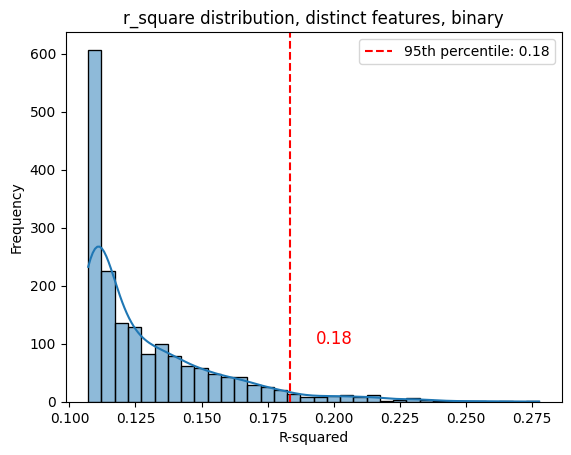

In [85]:
plot_rsquare_distribution(r_squares,'r_square distribution, distinct features, binary')

In [86]:
metabolite_distinct_SBI['r_square'].nlargest(10)

100009393    0.277765
100006441    0.263019
100001662    0.256920
100002952    0.251949
100000013    0.245908
100020715    0.240087
100003210    0.239179
999910458    0.235814
100003265    0.233351
100010834    0.233176
Name: r_square, dtype: float64

In [87]:
metabolites.to_list().index('100009393')

1123

Optimization terminated successfully.
         Current function value: 0.453109
         Iterations 7


C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3766817418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={'100009393': 'metabolite'}, inplace=True)
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3766817418.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


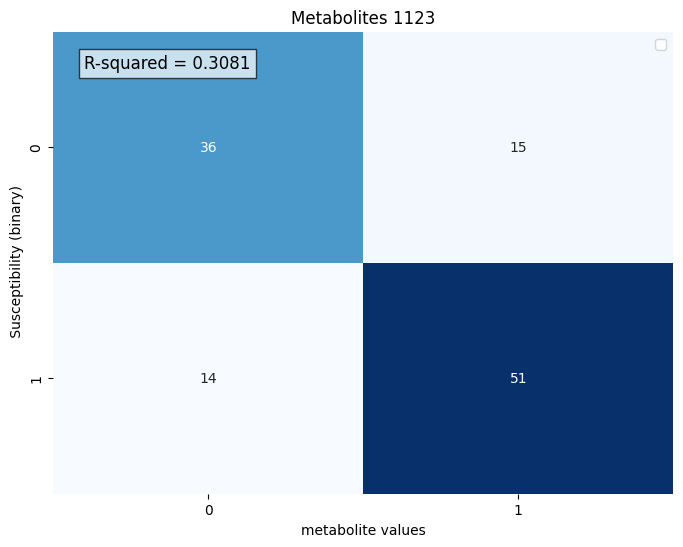

In [88]:
X_new=X[[metabolites[1123]]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']]
X_new.rename(columns={'100009393': 'metabolite'}, inplace=True)
y_train_new=y_all['Susceptibility (binary)']
data = pd.concat([X_new, y_train_new], axis=1)
data.columns = list(X_new.columns) + ['y']

logit_model = smf.logit(f'y ~ metabolite + Sex + Batch + MA_ancestor + Batch:RUN_ORDER',data=data).fit()
# logit_model = sm.Logit(y_all['Susceptibility (binary)'], X_train_with_intercept).fit()
plt.figure(figsize=(8, 6))
y_pred_prob = logit_model.predict(X_new)
y_pred_class = (y_pred_prob >= 0.5).astype(int)
# plt.scatter(train_new, y_pred_class, color='blue', alpha=0.6,label='Predicted')
# plt.scatter(train_new,y_all['Susceptibility (binary)'], color='purple', alpha=0.6,label='True')
contingency_table = pd.crosstab(y_all['Susceptibility (binary)'], y_pred_class)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
squared =  1 - (logit_model.llf / logit_model.llnull)
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 1123")
plt.xlabel("metabolite values")
plt.ylabel(" Susceptibility (binary)")
plt.legend()
plt.show()

In [89]:
p_values=[]
r_squares=[]
params=[]
for metabolite in metabolites:
    # p_value,r_square=simpleLinear(X[[metabolite]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']],y_all['Susceptibility (Broad)'])
    X_new=X[[metabolite]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']].copy()
    X_new.rename(columns={metabolite: 'metabolite'}, inplace=True)
    p_value,r_square,param=FeatureLinear(X_new,y_all['Susceptibility (Broad)'],f'y ~ metabolite + Sex + Batch + MA_ancestor + Batch:RUN_ORDER',binary=False)
    p_values.append(p_value)
    r_squares.append(r_square)
    params.append(param)
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)
print(max(r_squares))
    # if p_value[metabolite]<0.05 and r_square>0.5:
    #     print(metabolite,p_value,r_square)

0.9323653153354281


In [90]:
metabolite_distinct_SBR=pd.DataFrame({'p_value':p_values,'r_square':r_squares,'param':params},index=metabolites)

In [91]:
metabolite_distinct_SBR

,p_value,r_square,param
30,Intercept 9.053922e-16 metabolite ...,0.198180,Intercept 3.623674 metabolite ...
35,Intercept 1.924614e-14 metabolite ...,0.287319,Intercept 3.292486 metabolite ...
48,Intercept 0.020496 metabolite ...,0.508531,Intercept 2.341903 metabolite ...
49,Intercept 2.351062e-12 metabolite ...,0.227604,Intercept 3.397629 metabolite ...
50,Intercept 2.704470e-17 metabolite ...,0.198777,Intercept 3.569427 metabolite ...
...,...,...,...
999926266,Intercept 3.474303e-17 metabolite ...,0.198930,Intercept 3.572982 metabolite ...
999926267,Intercept 1.211607e-13 metabolite ...,0.162168,Intercept 3.847263 metabolite ...
999926268,Intercept 2.779752e-14 metabolite ...,0.224073,Intercept 3.330089 metabolite ...
999926273,Intercept 2.919199e-10 metabolite ...,0.365999,Intercept 3.383498 metabolite ...


In [92]:
metabolite_distinct_SBR['r_square'].nlargest(10)

100002466    0.932365
100015859    0.904863
100003605    0.894730
100001287    0.880619
100003597    0.876306
100009322    0.873881
100021232    0.872353
100003621    0.862004
100006100    0.855038
100008952    0.853606
Name: r_square, dtype: float64

In [93]:
metabolites.to_list().index('100002466')

675

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3910345183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.rename(columns={metabolites[675]: 'metabolite'}, inplace=True)


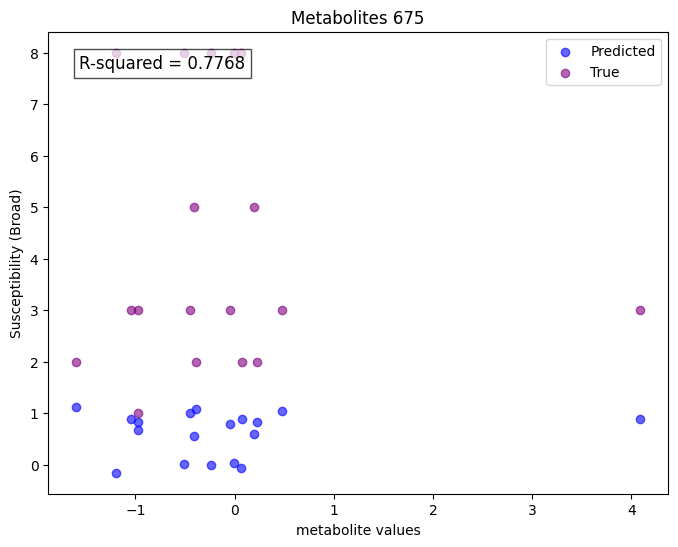

In [94]:
metabolites[675]
# Plot actual vs predicted values
X_new=X[[metabolites[675]]+['Sex', 'Batch','RUN_ORDER' ,'MA_ancestor']]
X_new.rename(columns={metabolites[675]: 'metabolite'}, inplace=True)
y_train_new=y_all['Susceptibility (binary)']
data = pd.concat([X_new, y_train_new], axis=1)
data.columns = list(X_new.columns) + ['y']

ols_model = smf.ols(f'y ~ metabolite + Sex + Batch + RUN_ORDER + MA_ancestor + Batch:RUN_ORDER',data=data).fit()
plt.figure(figsize=(8, 6))
plt.scatter(X_new[X_new['metabolite'].notna()]['metabolite'], ols_model.fittedvalues, color='blue', alpha=0.6,label='Predicted')
plt.scatter(X_new[X_new['metabolite'].notna()]['metabolite'],y_all['Susceptibility (Broad)'][X[metabolites[675]].notna()], color='purple', alpha=0.6,label='True')
squared = ols_model.rsquared
plt.text(0.05, 0.95, f'R-squared = {squared:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
# plt.plot([min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], [min(y_train['Susceptibility (Broad)']), max(y_train['Susceptibility (Broad)'])], 'r--', lw=2)  # Diagonal line
plt.title("Metabolites 675")
plt.xlabel("metabolite values")
plt.ylabel("Susceptibility (Broad)")
plt.legend()
plt.show()

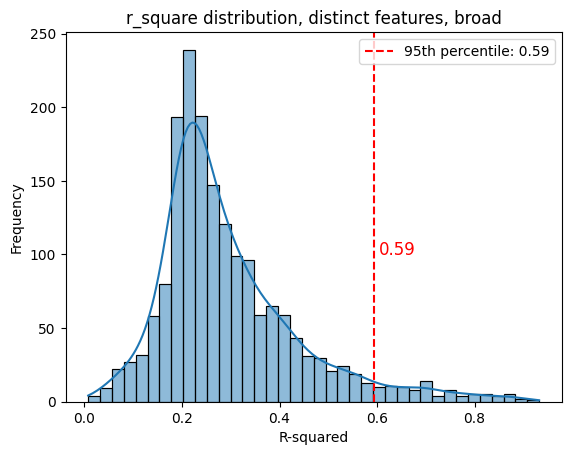

In [95]:
plot_rsquare_distribution(r_squares,'r_square distribution, distinct features, broad')

In [96]:
ols_model.summary()

C:\Users\11357\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     6.381
Date:                Thu, 17 Apr 2025   Prob (F-statistic):            0.00420
Time:                        12:19:21   Log-Likelihood:                0.88896
No. Observations:                  18   AIC:                             12.22
Df Residuals:                      11   BIC:                             18.45
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9931      0.315      3.156      0.009       0.301       1.686
metabolite          0.0757      0.063      1.192      0.258      -0.064       0.215
Sex                -0.0568      0.160     -0.354      0.730      -0.410       0.296
Batch               0.0336      0.363      0.093      0.928      -0.766       0.833
RUN_ORDER           0.0019      0.003      0.702      0.497      -0.004       0.008
MA_ancestor        -0.0451      0.008     -5.629      0.000      -0.063      -0.027
Batch:RUN_ORDER     0.0032      0.019      0.171      0.867      -0.038       0.044
==============================================================================
Omnibus:                       11.481   Durbin-Watson:                   2.715
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.495
Skew:                          -1.469   Prob(JB):                       0.0143
Kurtosis:                       4.642   Cond. No.                         665.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+['Animal class/order', 'Sex', 'Batch', 'ZooLab_Bronx Zoo [General]',
#        'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
#        'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
#        'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+[ 'ZooLab_Bronx Zoo [General]',
#        'ZooLab_Cape May County', 'ZooLab_Gorbunova Lab- NMR/DMR',
#        'ZooLab_Lehigh Valley', 'ZooLab_Maryland Zoo',
#        'ZooLab_Pacific Marine Mammal Center', 'ZooLab_Philadelphia Zoo']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+['Animal class/order']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+[ 'Sex']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+['Batch']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))
# p_values=[]
# r_squares=[]
# for metabolite in metabolites:
#     p_value,r_square=simpleLinear(X_train[[metabolite]+['MA_ancestor']],y_train['Susceptibility (binary)'])
#     p_values.append(p_value)
#     r_squares.append(r_square)
# print(max(r_squares))

# Common Metabolites

In [98]:
combined_r_squares = pd.concat([ metabolite_all_SBI['r_square'], metabolite_all_SBR['r_square']], axis=1)
# combined_r_squares.columns = ['df1_r_square', 'df2_r_square', 'df3_r_square', 'df4_r_square']

# top_100_r_squares = combined_r_squares.max(axis=1).nlargest(100)

# top_100_indices = top_100_r_squares.index

NameError: name 'metabolite_all_SBI' is not defined

In [ ]:
combined_r_squares

,r_square,r_square
30,0.243378,0.342612
35,0.260828,0.393163
48,0.235957,0.777564
49,0.245181,0.373672
50,0.242429,0.321576
...,...,...
999926266,0.235995,0.328171
999926267,0.240903,0.335366
999926268,0.260683,0.405841
999926273,0.236427,0.478696


In [ ]:
1887*0.25

471.75

In [ ]:
top_100_df1 = metabolite_all_SBR['r_square'].nlargest(472).index
top_100_df2 = metabolite_all_SBI['r_square'].nlargest(472).index
# top_100_df3 = metabolite_SBI['r_square'].nlargest(100).index
# top_100_df4 = metabolite_SBR['r_square'].nlargest(100).index

# common_top_100_indices = top_100_df1.intersection(top_100_df2).intersection(top_100_df3).intersection(top_100_df4)

In [ ]:
top_100_df1

Index(['132', '133', '100000093', '100000838', '100001418', '100001483',
       '100001880', '100001892', '100003186', '100003706',
       ...
       '100002991', '999925959', '999912125', '999926254', '100020597',
       '100016069', '291', '100010962', '999926099', '278'],
      dtype='object', length=472)

In [ ]:
top_100_df2

Index(['100004251', '999910458', '100009393', '100003265', '100010834',
       '100006441', '100001662', '100002398', '999925546', '100020715',
       ...
       '397', '100015855', '100003518', '100003185', '100004046', '100005975',
       '100005463', '100002945', '100003631', '100002021'],
      dtype='object', length=472)

In [ ]:
common_top_100_indices = top_100_df1.intersection(top_100_df2)

In [ ]:
common_top_100_indices

Index(['100006619', '999915728', '100002013', '999918901', '100004046',
       '100021504', '100002180', '100020707', '100002128', '100002021',
       '100005975', '100002022', '999913507', '100006363', '100006173',
       '100020227', '999924767', '100020416', '100020207', '100002577',
       '999924947', '247', '100004038', '100005831', '999922834', '999924810',
       '100008999', '100001226', '100008977', '100005829', '100002035',
       '100021238', '100019800', '999923587', '100002010', '100001612',
       '999925326', '100021223', '1125', '100009019', '100021059', '100000044',
       '100020825', '100015801', '100003637', '100008955', '100009312',
       '100001458', '100002129', '100009240', '193', '100003205', '100001743',
       '100001628', '100002796', '306', '100003239', '999926125', '100003563',
       '999926720', '999926162', '100006637', '100005805', '249', '100009009',
       '100002462', '100020674', '100009318', '999926107', '100015723',
       '100002154', '1000000

In [ ]:
len(common_top_100_indices)

79

In [ ]:
top_100_df1_distinct = metabolite_distinct_SBR['r_square'].nlargest(472).index
top_100_df2_distinct = metabolite_distinct_SBI['r_square'].nlargest(472).index
common_top_100_indices_distinct = top_100_df1_distinct.intersection(top_100_df2_distinct)

In [ ]:
len(common_top_100_indices_distinct)

94

In [ ]:
metabolite_all_SBI['meta_p_value']=1
for index,row in metabolite_all_SBI.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_all_SBI['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_10296\1263357847.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_10296\1263357847.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

In [ ]:
metabolite_all_SBR['meta_p_value']=1
for index,row in metabolite_all_SBR.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_all_SBR['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_10296\493381277.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_10296\493381277.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a sin

In [99]:
metabolite_distinct_SBI['meta_p_value']=1
for index,row in metabolite_distinct_SBI.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_distinct_SBI['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\2285294786.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\2285294786.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

In [100]:
metabolite_distinct_SBR['meta_p_value']=1
for index,row in metabolite_distinct_SBR.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_distinct_SBR['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1153898776.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1153898776.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

In [101]:
metabolite_SBR['meta_p_value']=1
for index,row in metabolite_SBR.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_SBR['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1002582955.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\1002582955.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

In [102]:
metabolite_SBI['meta_p_value']=1
for index,row in metabolite_SBI.iterrows():
    meta_p_value=row['p_value'][1]
    metabolite_SBI['meta_p_value'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\2551724497.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['p_value'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\2551724497.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a s

In [103]:
metabolite_SBI['metabolite_coefficient']=0
for index,row in metabolite_SBI.iterrows():
    meta_p_value=row['param'][1]
    metabolite_SBI['metabolite_coefficient'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3517546928.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['param'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\3517546928.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a sin

In [104]:
metabolite_SBR['metabolite_coefficient']=0
for index,row in metabolite_SBR.iterrows():
    meta_p_value=row['param'][1]
    metabolite_SBR['metabolite_coefficient'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\195098173.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['param'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\195098173.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a singl

In [105]:
metabolite_distinct_SBI['metabolite_coefficient']=0
for index,row in metabolite_distinct_SBI.iterrows():
    meta_p_value=row['param'][1]
    metabolite_distinct_SBI['metabolite_coefficient'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\760109868.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['param'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\760109868.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a singl

In [106]:
metabolite_distinct_SBR['metabolite_coefficient']=0
for index,row in metabolite_distinct_SBR.iterrows():
    meta_p_value=row['param'][1]
    metabolite_distinct_SBR['metabolite_coefficient'][index]=meta_p_value

C:\Users\11357\AppData\Local\Temp\ipykernel_41856\716799007.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta_p_value=row['param'][1]
C:\Users\11357\AppData\Local\Temp\ipykernel_41856\716799007.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a singl

In [107]:
metabolite_distinct_SBR['metabolite_coefficient'].nsmallest(10)

100002881   -1.694774
132         -1.608484
100020628   -1.433468
209         -1.430737
999925317   -1.425674
100002094   -1.228487
100000295   -1.188339
100000097   -1.124515
100001020   -1.053378
1442        -1.042462
Name: metabolite_coefficient, dtype: float64

In [108]:
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(metabolite_all_SBI['meta_p_value'], method='fdr_bh')[1]
metabolite_all_SBI['corrected p-value']=adjusted_p_values

NameError: name 'metabolite_all_SBI' is not defined

In [ ]:
valid_mask = metabolite_all_SBR['meta_p_value'].notna()
valid_p_values = metabolite_all_SBR.loc[valid_mask, 'meta_p_value']
metabolite_all_SBR.loc[valid_mask, 'corrected p-value'] = multipletests(valid_p_values, method='fdr_bh')[1]

In [109]:
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(metabolite_distinct_SBI['meta_p_value'], method='fdr_bh')[1]
metabolite_distinct_SBI['corrected p-value (fdr_bh)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_distinct_SBR['meta_p_value'], method='fdr_bh')[1]
metabolite_distinct_SBR['corrected p-value (fdr_bh)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_distinct_SBI['meta_p_value'], method='fdr_by')[1]
metabolite_distinct_SBI['corrected p-value (fdr_by)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_distinct_SBR['meta_p_value'], method='fdr_by')[1]
metabolite_distinct_SBR['corrected p-value (fdr_by)']=adjusted_p_values

In [110]:
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(metabolite_SBI['meta_p_value'], method='fdr_bh')[1]
metabolite_SBI['corrected p-value (fdr_bh)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_SBR['meta_p_value'], method='fdr_bh')[1]
metabolite_SBR['corrected p-value (fdr_bh)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_SBI['meta_p_value'], method='fdr_by')[1]
metabolite_SBI['corrected p-value (fdr_by)']=adjusted_p_values
adjusted_p_values = multipletests(metabolite_SBR['meta_p_value'], method='fdr_by')[1]
metabolite_SBR['corrected p-value (fdr_by)']=adjusted_p_values

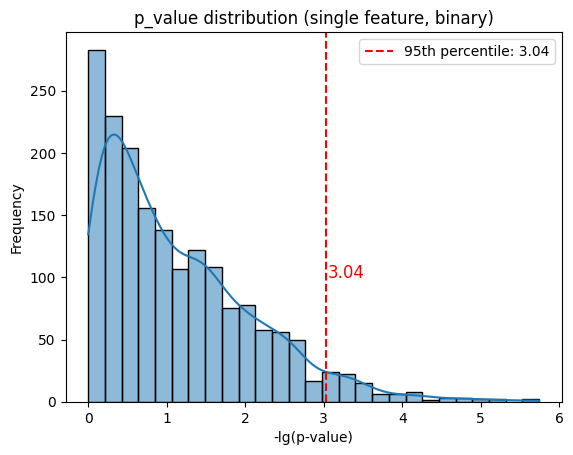

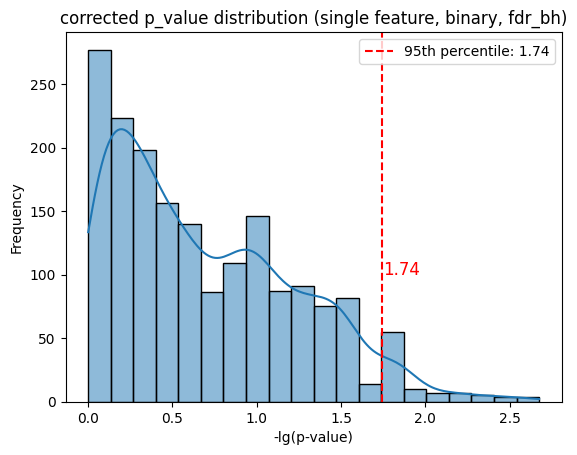

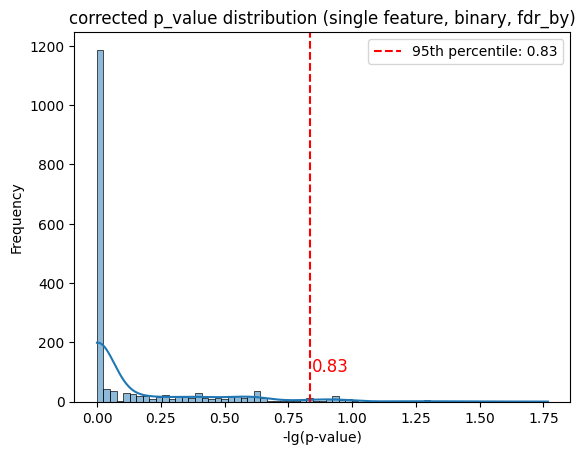

In [111]:
plot_pvalue_distribution(metabolite_SBI['meta_p_value'],'p_value distribution (single feature, binary)')
plot_pvalue_distribution(metabolite_SBI['corrected p-value (fdr_bh)'],'corrected p_value distribution (single feature, binary, fdr_bh)')
plot_pvalue_distribution(metabolite_SBI['corrected p-value (fdr_by)'],'corrected p_value distribution (single feature, binary, fdr_by)')

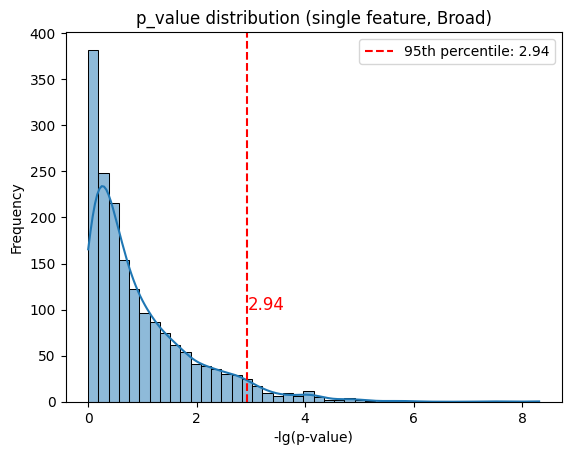

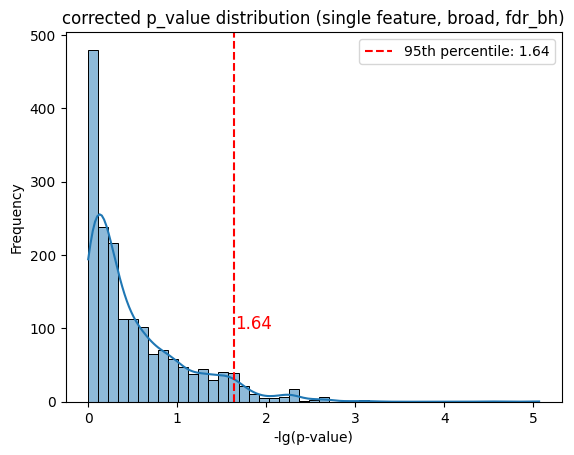

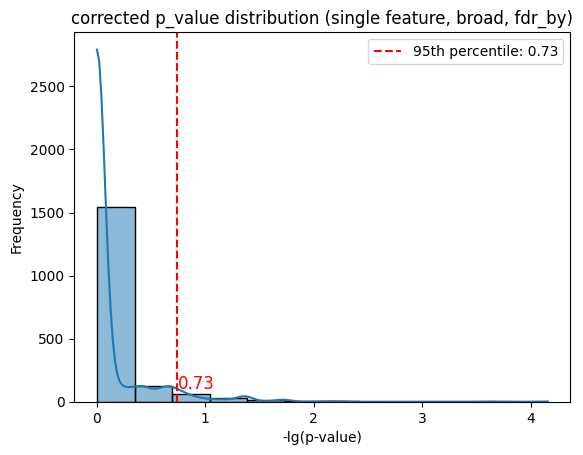

In [112]:
plot_pvalue_distribution(metabolite_SBR['meta_p_value'],'p_value distribution (single feature, Broad)')
plot_pvalue_distribution(metabolite_SBR['corrected p-value (fdr_bh)'],'corrected p_value distribution (single feature, broad, fdr_bh)')
plot_pvalue_distribution(metabolite_SBR['corrected p-value (fdr_by)'],'corrected p_value distribution (single feature, broad, fdr_by)')

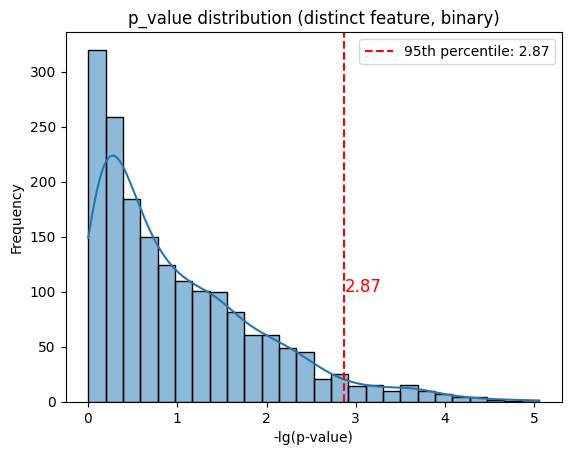

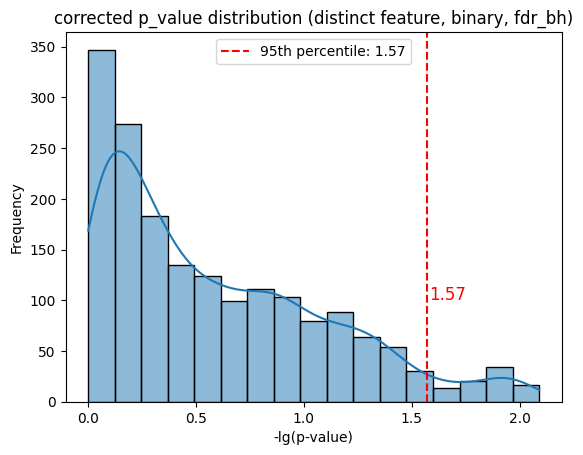

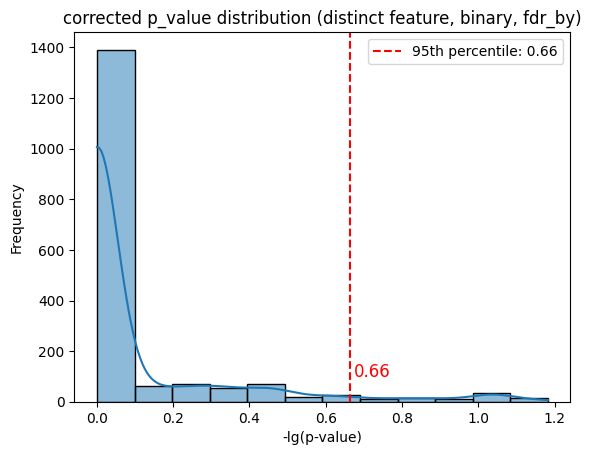

In [113]:
plot_pvalue_distribution(metabolite_distinct_SBI['meta_p_value'],'p_value distribution (distinct feature, binary)')
plot_pvalue_distribution(metabolite_distinct_SBI['corrected p-value (fdr_bh)'],'corrected p_value distribution (distinct feature, binary, fdr_bh)')
plot_pvalue_distribution(metabolite_distinct_SBI['corrected p-value (fdr_by)'],'corrected p_value distribution (distinct feature, binary, fdr_by)')

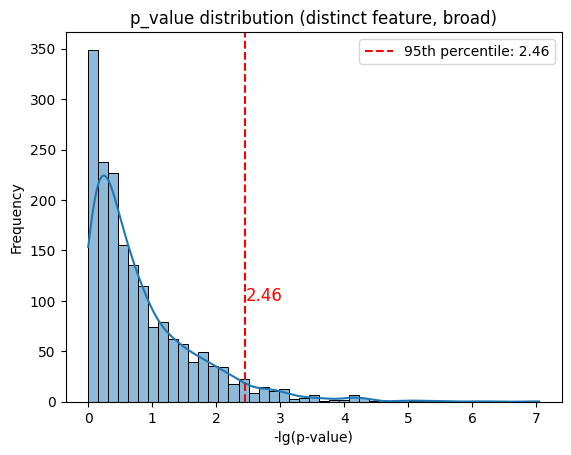

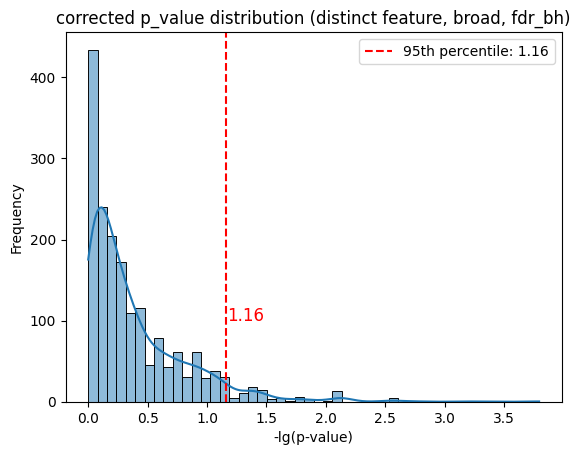

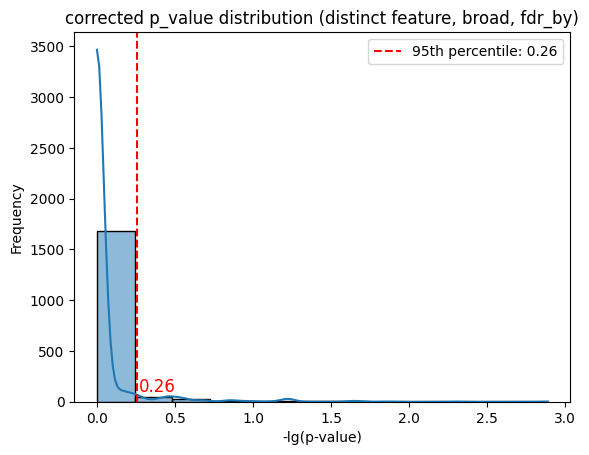

In [114]:
plot_pvalue_distribution(metabolite_distinct_SBR['meta_p_value'],'p_value distribution (distinct feature, broad)')
plot_pvalue_distribution(metabolite_distinct_SBR['corrected p-value (fdr_bh)'],'corrected p_value distribution (distinct feature, broad, fdr_bh)')
plot_pvalue_distribution(metabolite_distinct_SBR['corrected p-value (fdr_by)'],'corrected p_value distribution (distinct feature, broad, fdr_by)')

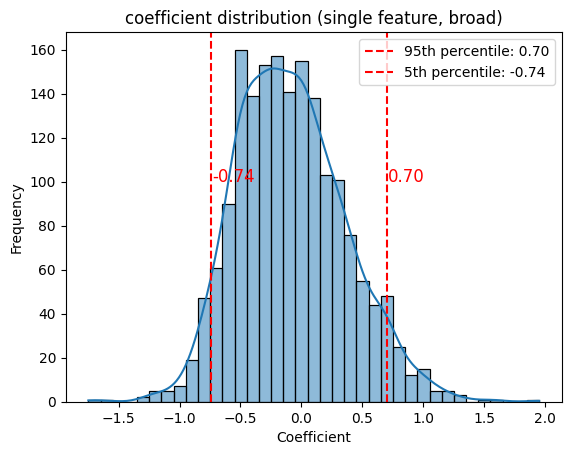

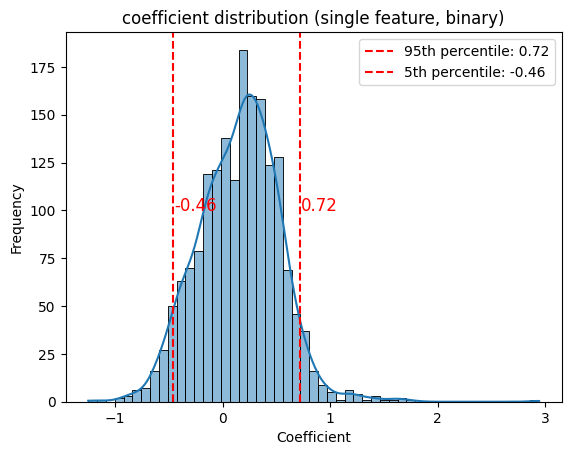

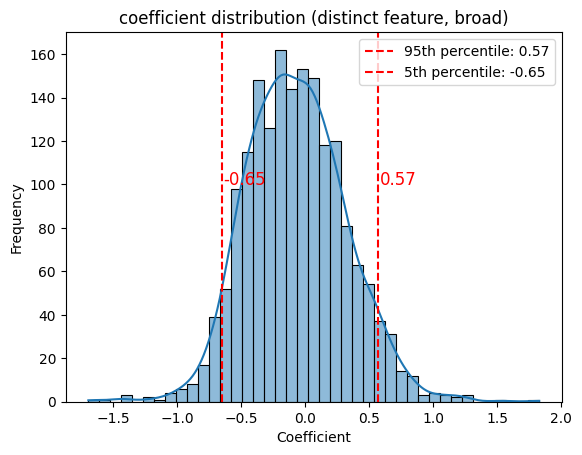

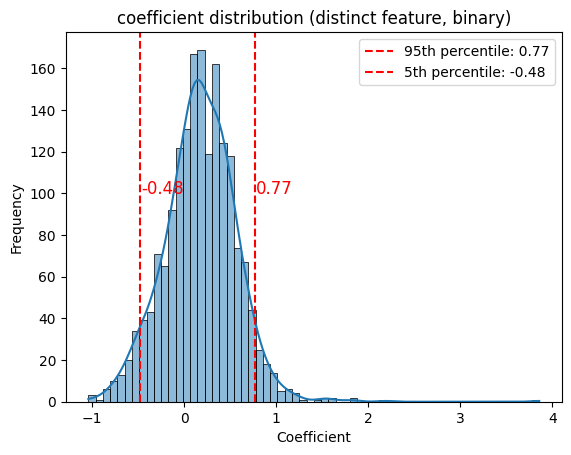

In [115]:
plot_coef_distribution(metabolite_SBR['metabolite_coefficient'],'coefficient distribution (single feature, broad)')
plot_coef_distribution(metabolite_SBI['metabolite_coefficient'],'coefficient distribution (single feature, binary)')
plot_coef_distribution(metabolite_distinct_SBR['metabolite_coefficient'],'coefficient distribution (distinct feature, broad)')
plot_coef_distribution(metabolite_distinct_SBI['metabolite_coefficient'],'coefficient distribution (distinct feature, binary)')

In [ ]:
top_pvalue_df1 = metabolite_all_SBR[metabolite_all_SBR['meta_p_value']<0.05].index
top_pvalue_df2 = metabolite_all_SBI[metabolite_all_SBI['meta_p_value']<0.05].index

In [ ]:
# uncorrected distinct 
top_pvalue_df1_distinct = metabolite_distinct_SBR[metabolite_distinct_SBR['meta_p_value']<0.05].index
top_pvalue_df2_disticnt = metabolite_distinct_SBI[metabolite_distinct_SBI['meta_p_value']<0.05].index
common_top_pvalue_indices_distinct = top_pvalue_df1_distinct.intersection(top_pvalue_df2_disticnt)
intersection_metabolite_distinct=common_top_pvalue_indices_distinct.intersection(common_top_100_indices_distinct)
intersection_metabolite_distinct=[int(i) for i in intersection_metabolite_distinct]

In [ ]:
# corrected all
top_pvalue_df1_corrected = metabolite_all_SBR[metabolite_all_SBR['corrected p-value']<0.1].index
top_pvalue_df2_corrected = metabolite_all_SBI[metabolite_all_SBI['corrected p-value']<0.1].index
common_top_pvalue_indices = top_pvalue_df1_corrected.intersection(top_pvalue_df2_corrected)
intersection_metabolite_corrected=common_top_pvalue_indices.intersection(common_top_100_indices)
intersection_metabolite_corrected=[int(i) for i in intersection_metabolite_corrected]

In [ ]:
intersection_metabolite_corrected

[999924453]

In [ ]:
# corrected_distinct distinct
top_pvalue_df1_corrected_distinct = metabolite_distinct_SBR[metabolite_distinct_SBR['corrected p-value']<0.1].index
top_pvalue_df2_corrected_distinct = metabolite_distinct_SBI[metabolite_distinct_SBI['corrected p-value']<0.1].index
common_top_pvalue_indices = top_pvalue_df1_corrected_distinct.intersection(top_pvalue_df2_corrected_distinct)
intersection_metabolite_corrected_distinct=common_top_pvalue_indices.intersection(common_top_100_indices_distinct)
intersection_metabolite_corrected_distinct=[int(i) for i in intersection_metabolite_corrected_distinct]

In [ ]:
np.percentile(metabolite_all_SBR[metabolite_all_SBR['corrected p-value'].notna()]['corrected p-value'],25)

np.float64(0.36689988496153747)

In [ ]:
np.percentile(metabolite_all_SBI[metabolite_all_SBR['corrected p-value'].notna()]['corrected p-value'],25)

np.float64(0.1946247518164477)

In [ ]:
common_top_pvalue_indices = top_pvalue_df1.intersection(top_pvalue_df2)

In [ ]:
common_top_pvalue_indices

Index(['55', '229', '247', '266', '278', '291', '297', '330', '391', '397',
       ...
       '999924810', '999924973', '999924989', '999925518', '999925546',
       '999925828', '999925855', '999926106', '999926107', '999926162'],
      dtype='object', length=189)

In [ ]:
common_top_pvalue_indices.intersection(common_top_100_indices)

Index(['247', '278', '291', '100000044', '100000086', '100002128', '100005805',
       '100005829', '100006173', '100009312', '100020707', '100021059',
       '999913507', '999922834', '999924453', '999924810', '999926107',
       '999926162'],
      dtype='object')

In [ ]:
intersection_metabolite=common_top_pvalue_indices.intersection(common_top_100_indices)

In [ ]:
intersection_metabolite=[int(i) for i in intersection_metabolite]

In [ ]:
len(common_top_pvalue_indices.intersection(common_top_100_indices))

18

# Pathway Info

In [ ]:
pathway=pd.read_excel("UNPA-02-24ML+ MIXED FECES DATA TABLES_animals.XLSX",sheet_name='Chemical Annotation')

In [ ]:
pathway[pathway['CHEM_ID'].isin(intersection_metabolite)]

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,PLOT_NAME,LIPID SPECIES LEVEL,LIPID MOLECULAR SPECIES LEVEL,LIPID SN POSITION LEVEL,CAS,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM
52,247,402,52273,164296,Cofactors and Vitamins,Vitamin A Metabolism,4505.0,NAMED,OENHQHLEOONYIE-JLTXGRSLSA-N,C/C(/C=C/C(C(C)(CCC1)C)=C1C)=C\C=C\C(C)=C\C=C\...,...,beta-carotene,NaN,NaN,NaN,7235-40-7,4444129,HMDB0000561,C02094,5280489,Pos Late
62,278,400,35637,156206,Amino Acid,Glutathione Metabolism,586.0,NAMED,ZUKPVRWZDMRIEO-UHFFFAOYSA-N,NC(C(NCC(O)=O)=O)CS,...,cysteinylglycine,NaN,NaN,NaN,19246-18-5,58762,HMDB0000078,C01419,439498,Pos Early
65,291,305,31260,147190,Carbohydrate,"Glycolysis, Gluconeogenesis, and Pyruvate Meta...",1263.0,NAMED,NBSCHQHZLSJFNQ-UHFFFAOYSA-N,OC1OC(C(C(C1O)O)O)COP(O)(O)=O,...,glucose 6-phosphate,NaN,NaN,NaN,103192-55-8,19952394,HMDB0001401,C00092,5958,Polar
274,100000044,400,15747,155593,Amino Acid,Histidine Metabolism,90.0,NAMED,MYYIAHXIVFADCU-QMMMGPOBSA-N,CN1C=NC=C1C[C@@H]([C@@](O)=O)NC(CCN)=O,...,anserine,NaN,NaN,NaN,10030-52-1,100482,HMDB0000194,C01262,112072,Pos Early
276,100000086,400,15125,155532,Xenobiotics,Food Component/Plant,4924.0,NAMED,QQVDJLLNRSOCEL-UHFFFAOYSA-N,O=P(O)(O)CCN,...,ciliatine (2-aminoethylphosphonate),NaN,NaN,NaN,2041-14-7,10463796,HMDB0011747,C03557,339,Pos Early
704,100002128,209,37482,151073,Lipid,Pregnenolone Steroids,3315.0,NAMED,OMOKWYAQVYBHMG-QUPIPBJSSA-N,O=[C@@](C)[C@@]1(O)CC[C@@]2([H])[C@]3([H])CC=C...,...,17alpha-hydroxypregnenolone 3-sulfate,NaN,NaN,NaN,28901-70-4,134824,HMDB0000416,NaN,152971,Neg
1080,100005805,209,46130,149868,Lipid,Lysophospholipid,2756.0,NAMED,XIVOBOJQPNEUSC-UXHICEINSA-N,CCCCCCCCCCCCCCCC(OC[C@]([H])(COP(O)(OC[C@]([NH...,...,1-palmitoyl-GPS (16:0)*,LPS 16:0,LPS 16:0,LPS 16:0/0:0,NaN,7826050,NaN,NaN,9547100,Neg
1083,100005829,209,61825,218245,Lipid,Endocannabinoid,2215.0,NAMED,XPZFMHCHEWYIGE-UHFFFAOYSA-N,CCCCCCCCCCCCCC(NCCS(=O)(O)=O)=O,...,N-myristoyltaurine*,NaN,NaN,NaN,NaN,3037686,NaN,NaN,3810823,Neg
1122,100006173,209,48394,154288,Lipid,Progestin Steroids,3356.0,NAMED,MENQCIVHHONJLU-GQCBXAOTSA-N,C[C@]12C(C3CC[C@@]4(C[C@@H](CC[C@@]4(C3CC2)C)O...,...,pregnanolone/allopregnanolone sulfate,NaN,NaN,NaN,NaN,NaN,"HMDB0240591,HMDB0062782",C05480,"31402,129699967",Neg
1265,100009312,209,54776,207653,Peptide,Dipeptide,960.0,NAMED,FADYJNXDPBKVCA-UHFFFAOYSA-N,O=C(O)C(CCCCN)NC(C(N)CC1=CC=CC=C1)=O,...,phenylalanyllysine,NaN,NaN,NaN,NaN,16568358,HMDB0029000,NaN,15607820,Neg


In [ ]:
pathway[pathway['CHEM_ID'].isin(intersection_metabolite_distinct)]

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,PLOT_NAME,LIPID SPECIES LEVEL,LIPID MOLECULAR SPECIES LEVEL,LIPID SN POSITION LEVEL,CAS,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM
6,55,400,27665,155829,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,4390.0,NAMED,LDHMAVIPBRSVRG-UHFFFAOYSA-N,C[N+]1=CC(C([NH-])=O)=CC=C1,...,1-methylnicotinamide,NaN,NaN,NaN,1005-24-9,8305504,HMDB0000699,C02918,457,Pos Early
116,498,402,1806,165222,Cofactors and Vitamins,Vitamin A Metabolism,4504.0,NAMED,FPIPGXGPPPQFEQ-OVSJKPMPSA-N,C/C(/C=C/C(C(C)(CCC1)C)=C1C)=C\C=C\C(C)=C\CO,...,retinol (vitamin A),NaN,NaN,NaN,68-26-8,393012,HMDB0000305,C00473,445354,Pos Late
240,1442,305,12129,147727,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",370.0,NAMED,AXFYFNCPONWUHW-UHFFFAOYSA-N,CC(C)(O)CC(O)=O,...,beta-hydroxyisovalerate,NaN,NaN,NaN,625-08-1,62571,HMDB0000754,NaN,69362,Polar
274,100000044,400,15747,155593,Amino Acid,Histidine Metabolism,90.0,NAMED,MYYIAHXIVFADCU-QMMMGPOBSA-N,CN1C=NC=C1C[C@@H]([C@@](O)=O)NC(CCN)=O,...,anserine,NaN,NaN,NaN,10030-52-1,100482,HMDB0000194,C01262,112072,Pos Early
275,100000054,400,15685,155573,Amino Acid,Lysine Metabolism,122.0,NAMED,YSMODUONRAFBET-AKGZTFGVSA-N,N[C@@H](CCC(O)CN)C(O)=O,...,5-hydroxylysine,NaN,NaN,NaN,13204-98-3,1002,HMDB0000450,C16741,3032849,Pos Early
443,100001198,209,32418,125828,Lipid,Long Chain Monounsaturated Fatty Acid,1571.0,NAMED,YWWVWXASSLXJHU-WAYWQWQTSA-N,O=C(CCCCCCC/C=C\CCCC)O,...,myristoleate (14:1n5),NaN,NaN,NaN,544-64-9,4444564,HMDB0002000,C08322,5281119,Neg
453,100001226,209,32426,144353,Cofactors and Vitamins,Hemoglobin and Porphyrin Metabolism,4487.0,NAMED,OBHRVMZSZIDDEK-UHFFFAOYSA-N,CC1=C(CC(NC2=O)C(CC)=C2C)NC(CC3=C(CCC(O)=O)C(C...,...,I-urobilinogen,NaN,NaN,NaN,14684-37-8,24980,HMDB0001898,C05789,9548718,Neg
501,100001391,402,34409,158657,Lipid,"Fatty Acid Metabolism (Acyl Carnitine, Long Ch...",1911.0,NAMED,FNPHNLNTJNMAEE-HSZRJFAPSA-N,[O-]C(C[C@@H](OC(CCCCCCCCCCCCCCCCC)=O)C[N+](C)...,...,stearoylcarnitine (C18),NaN,NaN,NaN,18822-91-8,21233653,HMDB0000848,NaN,3006797,Pos Late
545,100001526,400,37059,156288,Lipid,Fatty Acid Synthesis,1511.0,NAMED,ZGNBLKBZJBJFDG-UHFFFAOYSA-N,O=C(CC(O)=O)OC(CC([O-])=O)C[N+](C)(C)C,...,malonylcarnitine,NaN,NaN,NaN,853728-01-5,21403153,HMDB0002095,NaN,22833583,Pos Early
758,100002569,402,40084,159254,Cofactors and Vitamins,Hemoglobin and Porphyrin Metabolism,4488.0,NAMED,DOKCNDVEPDZOJQ-MBTHVWNTSA-N,OC(CCC1=C(C(CC(C(C)=C2C=C)NC2=O)=N\C1=C/C(NC(C...,...,D-urobilin,NaN,NaN,NaN,3947-38-4,NaN,HMDB0004160,C05795,5280820,Pos Late


In [ ]:
pathway[pathway['CHEM_ID'].isin(intersection_metabolite_corrected)]

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,PLOT_NAME,LIPID SPECIES LEVEL,LIPID MOLECULAR SPECIES LEVEL,LIPID SN POSITION LEVEL,CAS,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM
1940,999924453,400,52770,165605,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-24453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos Early


In [ ]:
pathway[pathway['CHEM_ID'].isin(intersection_metabolite_corrected_distinct)][['CHEM_ID','SUPER_PATHWAY',
       'SUB_PATHWAY','CHEMICAL_NAME']]

,CHEM_ID,SUPER_PATHWAY,SUB_PATHWAY,CHEMICAL_NAME
240,1442,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",beta-hydroxyisovalerate
274,100000044,Amino Acid,Histidine Metabolism,anserine
443,100001198,Lipid,Long Chain Monounsaturated Fatty Acid,myristoleate (14:1n5)
501,100001391,Lipid,"Fatty Acid Metabolism (Acyl Carnitine, Long Ch...",stearoylcarnitine (C18)
758,100002569,Cofactors and Vitamins,Hemoglobin and Porphyrin Metabolism,D-urobilin
1097,100006010,Xenobiotics,Drug - Cardiovascular,diosmin (diosmetin 7-rutinoside)
1282,100009393,Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6),hexadecatrienoate (16:3n3)
1345,100015724,Lipid,Sphingosines,heptadecasphingosine (d17:1)
1559,100021261,Peptide,Dipeptide Derivative,leucylhydroxyproline*
1591,100021712,Lipid,Secondary Bile Acid Metabolism,deoxycholic acid 12-sulfate*


In [ ]:
list(set(intersection_metabolite_distinct) & set(intersection_metabolite))

[100009312, 999913507, 999924453, 100000044, 100006173]

In [ ]:
list(set(intersection_metabolite_corrected) & set(intersection_metabolite_corrected_distinct))

[999924453]

In [ ]:
# batch=pd.read_csv('batch.csv',header=None)

In [ ]:
# allData['CLIENT_SAMPLE_ID']

In [ ]:
# batch[0][~batch[0].isin(allData['CLIENT_SAMPLE_ID'])]

In [ ]:
# pathway[pathway['CHEM_ID'].isin(intersection_metabolite_distinct)].to_csv('result_v2.csv')

In [ ]:
# pathway[pathway['CHEM_ID'].isin(intersection_metabolite)].to_csv('result_v1.csv')

In [ ]:
# pathway[pathway['CHEM_ID'].isin(intersection_metabolite_corrected)].to_csv('result_corrected_v1.csv')

In [ ]:
# pathway[pathway['CHEM_ID'].isin(intersection_metabolite_corrected_distinct)].to_csv('result_corrected_v2.csv')

In [ ]:
pathway.columns 

Index(['CHEM_ID', 'LIB_ID', 'COMP_ID', 'CHRO_LIB_ENTRY_ID', 'SUPER_PATHWAY',
       'SUB_PATHWAY', 'PATHWAY_SORTORDER', 'TYPE', 'INCHIKEY', 'SMILES',
       'CHEMICAL_NAME', 'PLOT_NAME', 'LIPID SPECIES LEVEL',
       'LIPID MOLECULAR SPECIES LEVEL', 'LIPID SN POSITION LEVEL', 'CAS',
       'CHEMSPIDER', 'HMDB', 'KEGG', 'PUBCHEM', 'PLATFORM'],
      dtype='object')

In [ ]:
pathway[pathway['CHEM_ID'].isin(list(set(intersection_metabolite_distinct) & set(intersection_metabolite)))][['CHEM_ID','SUPER_PATHWAY',
       'SUB_PATHWAY','CHEMICAL_NAME']]

,CHEM_ID,SUPER_PATHWAY,SUB_PATHWAY,CHEMICAL_NAME
274,100000044,Amino Acid,Histidine Metabolism,anserine
1122,100006173,Lipid,Progestin Steroids,pregnanolone/allopregnanolone sulfate
1265,100009312,Peptide,Dipeptide,phenylalanyllysine
1693,999913507,NaN,NaN,X-13507
1940,999924453,NaN,NaN,X-24453


In [ ]:
pathway[pathway['CHEM_ID'].isin(list(set(intersection_metabolite_corrected) & set(intersection_metabolite_corrected_distinct)))]

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,PLOT_NAME,LIPID SPECIES LEVEL,LIPID MOLECULAR SPECIES LEVEL,LIPID SN POSITION LEVEL,CAS,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM
1940,999924453,400,52770,165605,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-24453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos Early


In [ ]:
metabolite_distinct_SBI_prefixed = metabolite_distinct_SBI.add_prefix('distinct_binary_')
metabolite_distinct_SBR_prefixed = metabolite_distinct_SBR.add_prefix('distinct_broad_')
metabolite_SBI_prefixed = metabolite_SBI.add_prefix('single_binary_')
metabolite_SBR_prefixed = metabolite_SBR.add_prefix('single_broad_')

In [ ]:
result_v1=pd.concat([metabolite_SBI_prefixed,metabolite_SBR_prefixed,metabolite_distinct_SBI_prefixed,metabolite_distinct_SBR_prefixed],axis=1)

In [ ]:
result_v1

,single_binary_p_value,single_binary_r2_mcfadden,single_binary_aic,single_binary_param,single_binary_meta_p_value,single_binary_metabolite_coefficient,single_binary_corrected p-value (fdr_bh),single_binary_corrected p-value (fdr_by),single_broad_p_value,single_broad_r_square,...,distinct_binary_metabolite_coefficient,distinct_binary_corrected p-value (fdr_bh),distinct_binary_corrected p-value (fdr_by),distinct_broad_p_value,distinct_broad_r_square,distinct_broad_param,distinct_broad_meta_p_value,distinct_broad_metabolite_coefficient,distinct_broad_corrected p-value (fdr_bh),distinct_broad_corrected p-value (fdr_by)
30,const 0.279239 30 0.409156 dtype: flo...,0.004304,162.431541,const 0.207761 30 -0.144701 dtype: flo...,0.409156,-0.144701,0.561996,1.000000,const 1.145242e-38 30 9.179178e-01 dt...,0.000103,...,-0.123357,0.685595,1.000000,Intercept 9.053922e-16 metabolite ...,0.198180,Intercept 3.623674 metabolite ...,0.678594,0.087206,0.857781,1.0
35,const 0.037641 35 0.029935 dtype: flo...,0.030785,158.217965,const 0.442303 35 0.265430 dtype: flo...,0.029935,0.265430,0.104182,0.839663,const 9.016346e-35 35 1.949039e-02 dt...,0.057893,...,0.268763,0.139239,1.000000,Intercept 1.924614e-14 metabolite ...,0.287319,Intercept 3.292486 metabolite ...,0.063773,-0.379404,0.262178,1.0
48,const 0.187437 48 0.439979 dtype: flo...,0.003894,162.496752,const 0.483053 48 0.181217 dtype: flo...,0.439979,0.181217,0.584882,1.000000,const 1.062246e-08 48 7.423239e-01 dt...,0.005526,...,0.313110,0.474223,1.000000,Intercept 0.020496 metabolite ...,0.508531,Intercept 2.341903 metabolite ...,0.150960,-0.555146,0.418915,1.0
49,const 0.095632 49 0.061517 dtype: flo...,0.022784,159.491120,const 0.327538 49 0.295446 dtype: flo...,0.061517,0.295446,0.157256,1.000000,const 2.003565e-34 49 7.596358e-02 dt...,0.033472,...,0.252503,0.316398,1.000000,Intercept 2.351062e-12 metabolite ...,0.227604,Intercept 3.397629 metabolite ...,0.693500,-0.087242,0.866143,1.0
50,const 0.121652 50 0.268634 dtype: flo...,0.007820,161.871996,const 0.305161 50 -0.208345 dtype: flo...,0.268634,-0.208345,0.427887,1.000000,const 3.790461e-41 50 1.940822e-02 dt...,0.047002,...,0.120097,0.740436,1.000000,Intercept 2.704470e-17 metabolite ...,0.198777,Intercept 3.569427 metabolite ...,0.532709,0.126966,0.761135,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999926266,const 0.166466 999926266 0.583708 dt...,0.001901,162.813927,const 0.266626 999926266 0.126151 dt...,0.583708,0.126151,0.703301,1.000000,const 2.394050e-41 999926266 5.11870...,0.003817,...,0.027881,0.958865,1.000000,Intercept 3.474303e-17 metabolite ...,0.198930,Intercept 3.572982 metabolite ...,0.786389,0.066878,0.918775,1.0
999926267,const 0.372172 999926267 0.234731 dt...,0.008970,161.689155,const 0.174973 999926267 -0.173557 dt...,0.234731,-0.173557,0.389609,1.000000,const 1.336099e-32 999926267 6.94501...,0.001802,...,-0.092616,0.721163,1.000000,Intercept 1.211607e-13 metabolite ...,0.162168,Intercept 3.847263 metabolite ...,0.458079,-0.169316,0.707551,1.0
999926268,const 0.097273 999926268 0.135339 dt...,0.014563,160.799115,const 0.330869 999926268 0.268593 dt...,0.135339,0.268593,0.268861,1.000000,const 7.654501e-35 999926268 1.86433...,0.018896,...,0.302903,0.277382,1.000000,Intercept 2.779752e-14 metabolite ...,0.224073,Intercept 3.330089 metabolite ...,0.105009,-0.338928,0.352459,1.0
999926273,const 0.351670 999926273 0.732707 dt...,0.000732,162.999836,const 0.203698 999926273 -0.050812 dt...,0.732707,-0.050812,0.821540,1.000000,const 1.833087e-23 999926273 1.63696...,0.086748,...,0.180761,0.509498,1.000000,Intercept 2.919199e-10 metabolite ...,0.365999,Intercept 3.383498 metabolite ...,0.106755,0.381473,0.355049,1.0


In [ ]:
inter_sbr_sbi=result_v1[(result_v1['distinct_broad_corrected p-value (fdr_bh)']<0.1) & (result_v1['distinct_binary_corrected p-value (fdr_bh)']<0.1)]

In [ ]:
inter_sbr_sbi.columns

Index(['single_binary_p_value', 'single_binary_r2_mcfadden',
       'single_binary_aic', 'single_binary_param',
       'single_binary_meta_p_value', 'single_binary_metabolite_coefficient',
       'single_binary_corrected p-value (fdr_bh)',
       'single_binary_corrected p-value (fdr_by)', 'single_broad_p_value',
       'single_broad_r_square', 'single_broad_param',
       'single_broad_meta_p_value', 'single_broad_metabolite_coefficient',
       'single_broad_corrected p-value (fdr_bh)',
       'single_broad_corrected p-value (fdr_by)', 'distinct_binary_p_value',
       'distinct_binary_aic', 'distinct_binary_r_square',
       'distinct_binary_param', 'distinct_binary_meta_p_value',
       'distinct_binary_metabolite_coefficient',
       'distinct_binary_corrected p-value (fdr_bh)',
       'distinct_binary_corrected p-value (fdr_by)', 'distinct_broad_p_value',
       'distinct_broad_r_square', 'distinct_broad_param',
       'distinct_broad_meta_p_value', 'distinct_broad_metabolite_coe

In [ ]:
inter_sbr_sbi=inter_sbr_sbi[['single_binary_corrected p-value (fdr_bh)','single_binary_r2_mcfadden','single_binary_metabolite_coefficient',
                            'single_broad_corrected p-value (fdr_bh)','single_broad_r_square','single_broad_metabolite_coefficient',
                             'distinct_binary_corrected p-value (fdr_bh)', 'distinct_binary_r_square','distinct_binary_metabolite_coefficient',
                             'distinct_broad_corrected p-value (fdr_bh)','distinct_broad_r_square','distinct_broad_metabolite_coefficient']]

In [ ]:
inter_sbr=result_v1[(result_v1['distinct_broad_corrected p-value (fdr_bh)']<0.1)]

In [ ]:
inter_sbr=inter_sbr[['single_binary_corrected p-value (fdr_bh)','single_binary_r2_mcfadden','single_binary_metabolite_coefficient',
                            'single_broad_corrected p-value (fdr_bh)','single_broad_r_square','single_broad_metabolite_coefficient',
                             'distinct_binary_corrected p-value (fdr_bh)', 'distinct_binary_r_square','distinct_binary_metabolite_coefficient',
                             'distinct_broad_corrected p-value (fdr_bh)','distinct_broad_r_square','distinct_broad_metabolite_coefficient']]

In [ ]:
inter_sbi=result_v1[(result_v1['distinct_binary_corrected p-value (fdr_bh)']<0.1)]

In [ ]:
inter_sbi=inter_sbi[['single_binary_corrected p-value (fdr_bh)','single_binary_r2_mcfadden','single_binary_metabolite_coefficient',
                            'single_broad_corrected p-value (fdr_bh)','single_broad_r_square','single_broad_metabolite_coefficient',
                             'distinct_binary_corrected p-value (fdr_bh)', 'distinct_binary_r_square','distinct_binary_metabolite_coefficient',
                             'distinct_broad_corrected p-value (fdr_bh)','distinct_broad_r_square','distinct_broad_metabolite_coefficient']]

In [ ]:
result_v1[(result_v1['single_binary_corrected p-value (fdr_bh)']<0.1)]

,single_binary_p_value,single_binary_r2_mcfadden,single_binary_aic,single_binary_param,single_binary_meta_p_value,single_binary_metabolite_coefficient,single_binary_corrected p-value (fdr_bh),single_binary_corrected p-value (fdr_by),single_broad_p_value,single_broad_r_square,...,distinct_binary_metabolite_coefficient,distinct_binary_corrected p-value (fdr_bh),distinct_binary_corrected p-value (fdr_by),distinct_broad_p_value,distinct_broad_r_square,distinct_broad_param,distinct_broad_meta_p_value,distinct_broad_metabolite_coefficient,distinct_broad_corrected p-value (fdr_bh),distinct_broad_corrected p-value (fdr_by)
55,const 0.004274 55 0.002294 dtype: flo...,0.066567,152.524468,const 0.805186 55 0.538826 dtype: flo...,0.002294,0.538826,0.029617,0.238704,const 4.837086e-23 55 2.182072e-02 dt...,0.088886,...,0.639933,0.025609,0.206397,Intercept 6.315933e-12 metabolite ...,0.400573,Intercept 3.221248 metabolite ...,0.014263,-0.507539,0.121959,0.982943
72,const 0.549489 72 0.007751 dtype: flo...,0.047012,155.635975,const -0.144879 72 -0.338578 dtype: flo...,0.007751,-0.338578,0.049020,0.395086,const 2.354675e-21 72 6.661902e-01 dt...,0.003607,...,-0.311936,0.109707,0.884200,Intercept 1.007440e-07 metabolite ...,0.168237,Intercept 4.597877 metabolite ...,0.741172,0.091672,0.893027,1.000000
74,const 0.960273 74 0.005282 dtype: flo...,0.051282,154.956556,const -0.010601 74 -0.388449 dtype: flo...,0.005282,-0.388449,0.039752,0.320390,const 1.137475e-26 74 5.893963e-02 dt...,0.052222,...,-0.338301,0.129725,1.000000,Intercept 1.922539e-11 metabolite ...,0.196241,Intercept 4.500339 metabolite ...,0.292613,0.285204,0.578710,1.000000
75,const 0.946337 75 0.011279 dtype: flo...,0.042395,156.370578,const 0.014184 75 -0.339730 dtype: flo...,0.011279,-0.339730,0.058677,0.472912,const 2.346851e-32 75 1.610350e-01 dt...,0.024714,...,-0.354980,0.098529,0.794109,Intercept 2.624008e-14 metabolite ...,0.191547,Intercept 4.432917 metabolite ...,0.182087,0.311946,0.458054,1.000000
144,const 0.069892 144 0.004175 dtype: flo...,0.057928,153.899135,const 0.36674 144 0.59718 dtype: float64,0.004175,0.597180,0.035608,0.286983,const 4.367972e-41 144 1.520812e-02 dt...,0.053334,...,0.444825,0.155452,1.000000,Intercept 9.963979e-16 metabolite ...,0.206350,Intercept 3.424238 metabolite ...,0.210622,-0.256819,0.498599,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999926225,const 0.970354 999926225 0.001927 dt...,0.066510,152.533565,const -0.007809 999926225 -0.513475 dt...,0.001927,-0.513475,0.028046,0.226043,const 1.534777e-33 999926225 4.09693...,0.007918,...,-0.513300,0.047979,0.386693,Intercept 2.428067e-14 metabolite ...,0.199603,Intercept 4.055612 metabolite ...,0.398256,0.196787,0.667910,1.000000
999926240,const 0.032328 999926240 0.014750 dt...,0.039340,156.856709,const 0.454695 999926240 0.368322 dt...,0.014750,0.368322,0.068756,0.554144,const 1.155526e-33 999926240 2.46826...,0.014710,...,0.335673,0.142965,1.000000,Intercept 4.234108e-14 metabolite ...,0.287428,Intercept 3.204982 metabolite ...,0.660005,0.098884,0.844855,1.000000
999926243,const 0.007625 999926243 0.006872 dt...,0.050023,155.156963,const 0.719090 999926243 0.555982 dt...,0.006872,0.555982,0.046230,0.372596,const 3.764103e-27 999926243 3.61005...,0.057250,...,0.388892,0.214116,1.000000,Intercept 2.441407e-11 metabolite ...,0.204212,Intercept 3.466190 metabolite ...,0.140369,-0.404979,0.403391,1.000000
999926252,const 0.299600 999926252 0.000676 dt...,0.080177,150.358873,const -0.257204 999926252 -0.530173 dt...,0.000676,-0.530173,0.016386,0.132063,const 2.087040e-23 999926252 4.30243...,0.012008,...,-0.340980,0.151408,1.000000,Intercept 2.008673e-11 metabolite ...,0.306680,Intercept 4.230219 metabolite ...,0.446858,-0.255922,0.703641,1.000000


In [ ]:
result_v1[(result_v1['single_broad_corrected p-value (fdr_bh)']<0.1)]

,single_binary_p_value,single_binary_r2_mcfadden,single_binary_aic,single_binary_param,single_binary_meta_p_value,single_binary_metabolite_coefficient,single_binary_corrected p-value (fdr_bh),single_binary_corrected p-value (fdr_by),single_broad_p_value,single_broad_r_square,...,distinct_binary_metabolite_coefficient,distinct_binary_corrected p-value (fdr_bh),distinct_binary_corrected p-value (fdr_by),distinct_broad_p_value,distinct_broad_r_square,distinct_broad_param,distinct_broad_meta_p_value,distinct_broad_metabolite_coefficient,distinct_broad_corrected p-value (fdr_bh),distinct_broad_corrected p-value (fdr_by)
132,const 0.670605 132 0.142887 dtype: flo...,0.014085,160.875283,const -0.137251 132 -0.331664 dtype: flo...,0.142887,-0.331664,0.279787,1.000000,const 5.996303e-15 132 2.091264e-03 dt...,0.355876,...,0.028931,0.958865,1.000000,Intercept 4.003413e-08 metabolite ...,0.693028,Intercept 5.867436 metabolite ...,0.000059,-1.608484,0.007371,0.059407
144,const 0.069892 144 0.004175 dtype: flo...,0.057928,153.899135,const 0.36674 144 0.59718 dtype: float64,0.004175,0.597180,0.035608,0.286983,const 4.367972e-41 144 1.520812e-02 dt...,0.053334,...,0.444825,0.155452,1.000000,Intercept 9.963979e-16 metabolite ...,0.206350,Intercept 3.424238 metabolite ...,0.210622,-0.256819,0.498599,1.000000
189,const 0.136822 189 0.012786 dtype: flo...,0.041470,156.517820,const 0.288747 189 0.458211 dtype: flo...,0.012786,0.458211,0.063255,0.509809,const 1.161235e-41 189 9.064090e-04 dt...,0.099990,...,0.417959,0.130102,1.000000,Intercept 1.517128e-16 metabolite ...,0.247378,Intercept 3.755173 metabolite ...,0.015530,-0.508184,0.128285,1.000000
192,const 0.261997 192 0.002487 dtype: flo...,0.063997,152.933440,const 0.219338 192 0.669036 dtype: flo...,0.002487,0.669036,0.029617,0.238704,const 1.968476e-44 192 1.936144e-03 dt...,0.081865,...,0.641913,0.060742,0.489559,Intercept 3.754704e-18 metabolite ...,0.242685,Intercept 3.717270 metabolite ...,0.012804,-0.509528,0.117219,0.944744
229,const 0.080632 229 0.001714 dtype: flo...,0.069738,152.019940,const 0.35292 229 0.61938 dtype: float64,0.001714,0.619380,0.027185,0.219104,const 1.022354e-42 229 8.720053e-04 dt...,0.096243,...,0.626478,0.043925,0.354021,Intercept 1.427511e-17 metabolite ...,0.280703,Intercept 3.501175 metabolite ...,0.004312,-0.512099,0.071887,0.579380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999925955,const 0.104143 999925955 0.014836 dt...,0.040278,156.707516,const 0.317904 999925955 0.510768 dt...,0.014836,0.510768,0.068760,0.554183,const 5.204791e-43 999925955 5.92505...,0.065661,...,0.509608,0.109601,0.883339,Intercept 1.592673e-17 metabolite ...,0.227913,Intercept 3.601635 metabolite ...,0.009243,-0.538071,0.100654,0.811230
999926241,const 0.128815 999926241 0.412892 dt...,0.004261,162.438306,const 0.323971 999926241 0.156561 dt...,0.412892,0.156561,0.565814,1.000000,const 6.048840e-36 999926241 5.40660...,0.078619,...,0.201684,0.562721,1.000000,Intercept 1.631307e-12 metabolite ...,0.260692,Intercept 3.454734 metabolite ...,0.005303,-0.713677,0.079813,0.643264
999926242,const 0.166153 999926242 0.572507 dt...,0.002014,162.795872,const 0.313677 999926242 0.108605 dt...,0.572507,0.108605,0.694550,1.000000,const 1.329570e-31 999926242 5.99710...,0.084525,...,0.193441,0.579171,1.000000,Intercept 1.050895e-10 metabolite ...,0.298307,Intercept 3.292361 metabolite ...,0.017511,-0.674450,0.131400,1.000000
999926244,const 0.070102 999926244 0.064146 dt...,0.022317,159.565307,const 0.366802 999926244 0.364807 dt...,0.064146,0.364807,0.161169,1.000000,const 2.331135e-40 999926244 1.68285...,0.090095,...,0.211115,0.515384,1.000000,Intercept 2.160712e-16 metabolite ...,0.226008,Intercept 3.670506 metabolite ...,0.033277,-0.519907,0.184282,1.000000


In [ ]:
inter_sbr_sbi.index.name = 'metabolites'
inter_sbi.index.name = 'metabolites'
inter_sbr.index.name = 'metabolites'

In [ ]:
pathway_res=inter_sbr_sbi.index.to_list()
pathway_res=[int(x) for x in pathway_res]

In [ ]:
pathway_res=pathway[pathway['CHEM_ID'].isin(pathway_res)]

In [ ]:
output_file = "metabolites_analysis_result.xlsx"

# Write DataFrames to different sheets
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    inter_sbr_sbi.to_excel(writer, sheet_name='Significant_intersection', index=True, index_label='metabolites')  # No index in Excel
    inter_sbi.to_excel(writer, sheet_name='Significant_binary', index=True, index_label='metabolites')
    inter_sbr.to_excel(writer, sheet_name='Significant_broad', index=True, index_label='metabolites')
    pathway_res.to_excel(writer, sheet_name='intersection_metabolites_info', index=False)

In [ ]:
pathway_res

,CHEM_ID,LIB_ID,COMP_ID,CHRO_LIB_ENTRY_ID,SUPER_PATHWAY,SUB_PATHWAY,PATHWAY_SORTORDER,TYPE,INCHIKEY,SMILES,...,PLOT_NAME,LIPID SPECIES LEVEL,LIPID MOLECULAR SPECIES LEVEL,LIPID SN POSITION LEVEL,CAS,CHEMSPIDER,HMDB,KEGG,PUBCHEM,PLATFORM
44,229,209,1110,125971,Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6),1618.0,NAMED,YZXBAPSDXZZRGB-DOFZRALJSA-N,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(O)=O,...,arachidonate (20:4n6),NaN,NaN,NaN,506-32-1,392692,HMDB0001043,C00219,444899,Neg
59,266,402,63,164177,Lipid,Sterol,3256.0,NAMED,HVYWMOMLDIMFJA-LBHVWCRMSA-N,CC1(C2C(C)CCCC(C)C)C(CC2)C(CC=C3C4(CC[C@H](O)C...,...,cholesterol,NaN,NaN,NaN,57-88-5,4937803,HMDB0000067,C00187,"5997,6432564,11025495",Pos Late
66,297,402,17747,158164,Lipid,Sphingosines,3223.0,NAMED,WWUZIQQURGPMPG-CCEZHUSRSA-N,CCCCCCCCCCCCC/C=C/C(C(CO)N)O,...,sphingosine,NaN,NaN,NaN,123-78-4,4510275,HMDB0000252,C00319,5280335,Pos Late
68,302,209,1114,125714,Lipid,Secondary Bile Acid Metabolism,3549.0,NAMED,KXGVEGMKQFWNSR-OHAQSFBXSA-N,CC12[C@@]([C@]3([H])CC[C@]4([H])C[C@H](O)CC[C@...,...,deoxycholate,NaN,NaN,NaN,83-44-3,389318,HMDB0000626,C04483,"222528,440355",Neg
73,330,305,1643,146876,Energy,TCA Cycle,1489.0,NAMED,VZCYOOQTPOCHFL-OWOJBTEDSA-N,OC(/C=C/C(O)=O)=O,...,fumarate,NaN,NaN,NaN,100-17-8,10197150,HMDB0000134,C00122,444972,Polar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,999924453,400,52770,165605,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-24453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos Early
1977,999924801,400,54829,207715,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-24801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos Early
2030,999925501,209,62935,220803,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-25501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neg
2038,999925509,209,62943,220811,NaN,NaN,NaN,UNNAMED,NaN,NaN,...,X-25509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neg


In [ ]:
# result_v1.to_csv('metabolites_result_v1.csv')

In [ ]:
# pathway[pathway['CHEM_ID'].isin(list(set(intersection_metabolite_corrected) & set(intersection_metabolite_corrected_distinct)))].to_csv('result_correct_intersection.csv')

In [ ]:
res=pd.read_csv('C:\\E盘迁移文件\\2024fall\\Research project\\stored_data\\quality_report.tsv',sep='\t')

In [ ]:
res= res[res['Name'] != 'Name']

In [ ]:
res['Completeness'] = res['Completeness'].astype(float)
res['Contamination'] = res['Contamination'].astype(float)

In [ ]:
res[(res['Completeness'] > 50) & (res['Contamination'] < 5)]

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
1,wild_biome_2~_~BALB_c_1.metabat.108,98.25,0.00,Gradient Boost (General Model),11,0.897,174100,344.8027245206862,2282940,0.35,1982,NaN
2,wild_biome_2~_~BALB_c_1.metabat.110,81.64,0.00,Neural Network (Specific Model),11,0.916,66877,343.6909003370246,2334767,0.46,2077,NaN
3,wild_biome_2~_~BALB_c_1.metabat.115,94.40,3.57,Gradient Boost (General Model),11,0.883,29379,319.12833511205974,4054719,0.51,3748,NaN
4,wild_biome_2~_~BALB_c_1.metabat.116,80.75,1.54,Gradient Boost (General Model),11,0.888,70242,328.18189655172415,2568553,0.48,2320,NaN
5,wild_biome_2~_~BALB_c_1.metabat.119,79.15,3.03,Gradient Boost (General Model),11,0.893,13425,290.3717888836992,2085866,0.63,2141,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2175,wild_biome_2~_~ZA_9.metabat.71,90.66,1.31,Gradient Boost (General Model),11,0.925,38987,383.8594327990136,3026377,0.49,2433,NaN
2176,wild_biome_2~_~ZA_9.metabat.8,77.21,1.40,Neural Network (Specific Model),11,0.91,55803,361.5055970149254,1914171,0.47,1608,NaN
2177,wild_biome_2~_~ZA_9.metabat.80,84.62,1.75,Neural Network (Specific Model),11,0.905,117894,355.4530221424297,1967232,0.38,1671,NaN
2179,wild_biome_2~_~ZA_9.metabat.88,88.58,2.11,Neural Network (Specific Model),11,0.89,120043,363.3196622436671,2027736,0.53,1658,NaN
